In [1]:
# Two-group comparison
# Group1: 1987 - 1989
# Group2: 2003 - 2015


📊 Monthly Summary Statistics for India Air Quality Before vs After Policy:

       Group   NO2_Mean   NO2_Std   SO2_Mean   SO2_Std
0  1987–1989  27.874909  8.632299  20.664330  5.666335
1  2003–2014  25.992023  3.102284  10.552867  1.663330


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4500\2579393283.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_monthly, x='Period', y='no2', palette="Blues")
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4500\2579393283.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_monthly, x='Period', y='so2', palette="Reds")


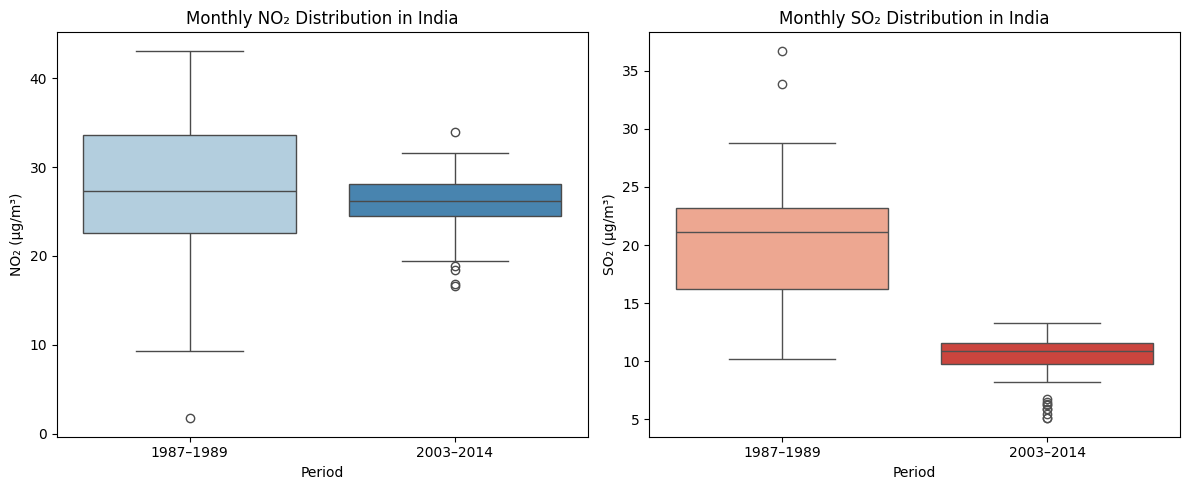

In [2]:
# all india
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("data/data.csv", encoding="ISO-8859-1", low_memory=False)

# Convert 'date' to datetime and extract components
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

# Define time periods
group1_years = [1987, 1988, 1989]
group2_years = list(range(2003, 2015))

# Filter the two groups
group1_df = df[df['year'].isin(group1_years)].copy()
group2_df = df[df['year'].isin(group2_years)].copy()

# Resample to monthly averages
group1_monthly = group1_df.set_index('date').resample('ME')[['no2', 'so2']].mean().dropna()
group2_monthly = group2_df.set_index('date').resample('ME')[['no2', 'so2']].mean().dropna()

# Add Period labels
group1_monthly['Period'] = '1987–1989'
group2_monthly['Period'] = '2003–2014'

# Combine monthly data
combined_monthly = pd.concat([group1_monthly, group2_monthly])

# Summary statistics (from monthly data)
summary = pd.DataFrame({
    "Group": ["1987–1989", "2003–2014"],
    "NO2_Mean": [group1_monthly['no2'].mean(), group2_monthly['no2'].mean()],
    "NO2_Std": [group1_monthly['no2'].std(), group2_monthly['no2'].std()],
    "SO2_Mean": [group1_monthly['so2'].mean(), group2_monthly['so2'].mean()],
    "SO2_Std": [group1_monthly['so2'].std(), group2_monthly['so2'].std()]
})

print("\n📊 Monthly Summary Statistics for India Air Quality Before vs After Policy:\n")
print(summary)

# Boxplot Comparison (monthly data)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=combined_monthly, x='Period', y='no2', palette="Blues")
plt.title("Monthly NO₂ Distribution in India")
plt.ylabel("NO₂ (µg/m³)")

plt.subplot(1, 2, 2)
sns.boxplot(data=combined_monthly, x='Period', y='so2', palette="Reds")
plt.title("Monthly SO₂ Distribution in India")
plt.ylabel("SO₂ (µg/m³)")

plt.tight_layout()
plt.show()

In [3]:
"""
Let’s run Welch’s t-test (robust to unequal variances and sample sizes)
to formally check whether the changes in SO₂ and NO₂
are statistically significant between the two periods.
"""

'\nLet’s run Welch’s t-test (robust to unequal variances and sample sizes)\nto formally check whether the changes in SO₂ and NO₂\nare statistically significant between the two periods.\n'

In [4]:
from scipy.stats import ttest_ind

print("\n🧪 Welch’s T-Test Results Based on Monthly Averages (All India):\n")

# Drop NaNs from monthly data
no2_group1 = group1_monthly['no2'].dropna()
no2_group2 = group2_monthly['no2'].dropna()
so2_group1 = group1_monthly['so2'].dropna()
so2_group2 = group2_monthly['so2'].dropna()

# Perform Welch's t-test (does not assume equal variances)
t_no2, p_no2 = ttest_ind(no2_group1, no2_group2, equal_var=False)
t_so2, p_so2 = ttest_ind(so2_group1, so2_group2, equal_var=False)

# Print results
print(f"NO₂: t = {t_no2:.2f}, p = {p_no2:.5f}")
print(f"SO₂: t = {t_so2:.2f}, p = {p_so2:.5f}")

# Interpretation
alpha = 0.05
print("\n📌 Interpretation (α = 0.05):")
if p_no2 < alpha:
    print("✅ NO₂ levels changed significantly between 1987–1989 and 2003–2014.")
else:
    print("❌ NO₂ levels did not change significantly.")

if p_so2 < alpha:
    print("✅ SO₂ levels changed significantly between 1987–1989 and 2003–2014.")
else:
    print("❌ SO₂ levels did not change significantly.")


🧪 Welch’s T-Test Results Based on Monthly Averages (All India):

NO₂: t = 1.27, p = 0.21197
SO₂: t = 10.45, p = 0.00000

📌 Interpretation (α = 0.05):
❌ NO₂ levels did not change significantly.
✅ SO₂ levels changed significantly between 1987–1989 and 2003–2014.


In [5]:
# Only Delhi


📊 Monthly Summary Statistics for Delhi Air Quality Before vs After Policy:

       Group   NO2_Mean    NO2_Std   SO2_Mean   SO2_Std
0  1987–1989  19.083016   2.801973  13.010357  4.658597
1  2003–2014  58.782462  17.460927   7.068073  2.512987


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4500\242322489.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_monthly, x='Period', y='no2', palette="Blues")
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4500\242322489.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_monthly, x='Period', y='so2', palette="Reds")


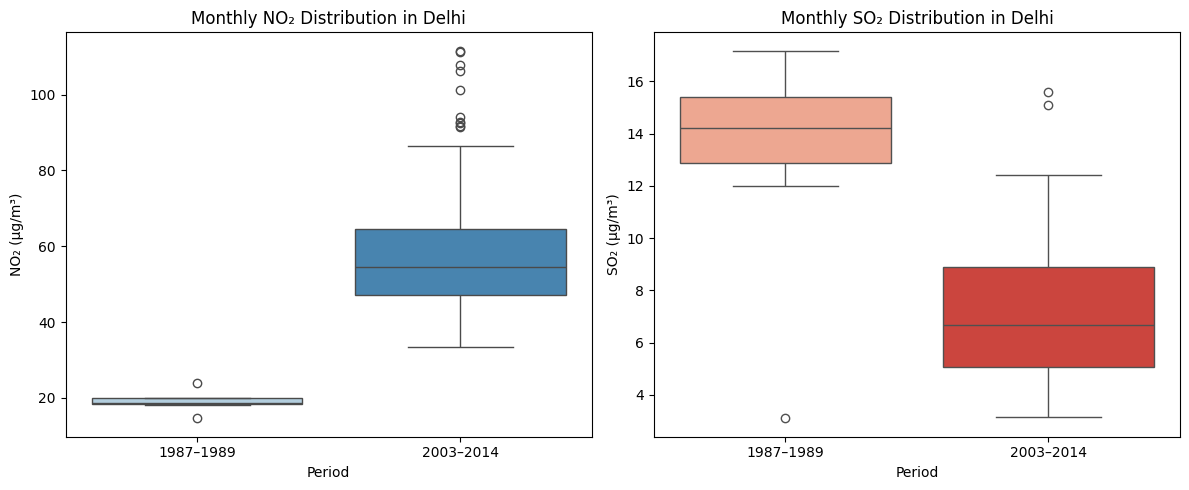

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("data/data.csv", encoding="ISO-8859-1", low_memory=False)

# Convert 'date' to datetime and extract components
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

# Filter only Delhi data
delhi_df = df[df['state'].str.contains("Delhi", na=False)]

# Define time periods
group1_years = [1987, 1988, 1989]
group2_years = list(range(2003, 2015))

# Filter by year
group1_df = delhi_df[delhi_df['year'].isin(group1_years)].copy()
group2_df = delhi_df[delhi_df['year'].isin(group2_years)].copy()

# Resample to monthly averages
group1_monthly = group1_df.set_index('date').resample('ME')[['no2', 'so2']].mean().dropna()
group2_monthly = group2_df.set_index('date').resample('ME')[['no2', 'so2']].mean().dropna()

# Add Period labels
group1_monthly['Period'] = '1987–1989'
group2_monthly['Period'] = '2003–2014'

# Combine
combined_monthly = pd.concat([group1_monthly, group2_monthly])

# Summary statistics
summary = pd.DataFrame({
    "Group": ["1987–1989", "2003–2014"],
    "NO2_Mean": [group1_monthly['no2'].mean(), group2_monthly['no2'].mean()],
    "NO2_Std": [group1_monthly['no2'].std(), group2_monthly['no2'].std()],
    "SO2_Mean": [group1_monthly['so2'].mean(), group2_monthly['so2'].mean()],
    "SO2_Std": [group1_monthly['so2'].std(), group2_monthly['so2'].std()]
})

print("\n📊 Monthly Summary Statistics for Delhi Air Quality Before vs After Policy:\n")
print(summary)

# Boxplot Comparison (monthly data)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=combined_monthly, x='Period', y='no2', palette="Blues")
plt.title("Monthly NO₂ Distribution in Delhi")
plt.ylabel("NO₂ (µg/m³)")

plt.subplot(1, 2, 2)
sns.boxplot(data=combined_monthly, x='Period', y='so2', palette="Reds")
plt.title("Monthly SO₂ Distribution in Delhi")
plt.ylabel("SO₂ (µg/m³)")

plt.tight_layout()
plt.show()


In [7]:
"""
Let’s run Welch’s t-test (robust to unequal variances and sample sizes)
to formally check whether the changes in SO₂ and NO₂
are statistically significant between the two periods.
"""

'\nLet’s run Welch’s t-test (robust to unequal variances and sample sizes)\nto formally check whether the changes in SO₂ and NO₂\nare statistically significant between the two periods.\n'

In [8]:
from scipy.stats import ttest_ind

# Drop missing values from monthly-resampled Delhi data
no2_group1 = group1_monthly['no2'].dropna()
no2_group2 = group2_monthly['no2'].dropna()
so2_group1 = group1_monthly['so2'].dropna()
so2_group2 = group2_monthly['so2'].dropna()

# Perform Welch's t-test (assumes unequal variances)
t_no2, p_no2 = ttest_ind(no2_group1, no2_group2, equal_var=False)
t_so2, p_so2 = ttest_ind(so2_group1, so2_group2, equal_var=False)

# Display results
print("📊 Welch’s T-Test Results (Delhi, Monthly Averages):\n")
print(f"NO₂: t = {t_no2:.2f}, p = {p_no2:.5f}")
print(f"SO₂: t = {t_so2:.2f}, p = {p_so2:.5f}")

# Interpretation
alpha = 0.05
print("\n📌 Interpretation:")
if p_no2 < alpha:
    print("✅ NO₂ levels are significantly different between 1987–1989 and 2003–2014.")
else:
    print("❌ NO₂ levels are NOT significantly different between 1987–1989 and 2003–2014.")

if p_so2 < alpha:
    print("✅ SO₂ levels are significantly different between 1987–1989 and 2003–2014.")
else:
    print("❌ SO₂ levels are NOT significantly different between 1987–1989 and 2003–2014.")


📊 Welch’s T-Test Results (Delhi, Monthly Averages):

NO₂: t = -20.74, p = 0.00000
SO₂: t = 3.35, p = 0.01472

📌 Interpretation:
✅ NO₂ levels are significantly different between 1987–1989 and 2003–2014.
✅ SO₂ levels are significantly different between 1987–1989 and 2003–2014.


In [9]:
"""
    •	Temporal Analysis:
        o	Analyze air quality trends over the years.
        o	Identify any seasonal patterns or significant changes.
"""

'\n    •\tTemporal Analysis:\n        o\tAnalyze air quality trends over the years.\n        o\tIdentify any seasonal patterns or significant changes.\n'

In [10]:
# Seasonality

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3707989337.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.grid(True); plt.legend(); plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3707989337.py:32: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.grid(True); plt.legend(); plt.tight_layout()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


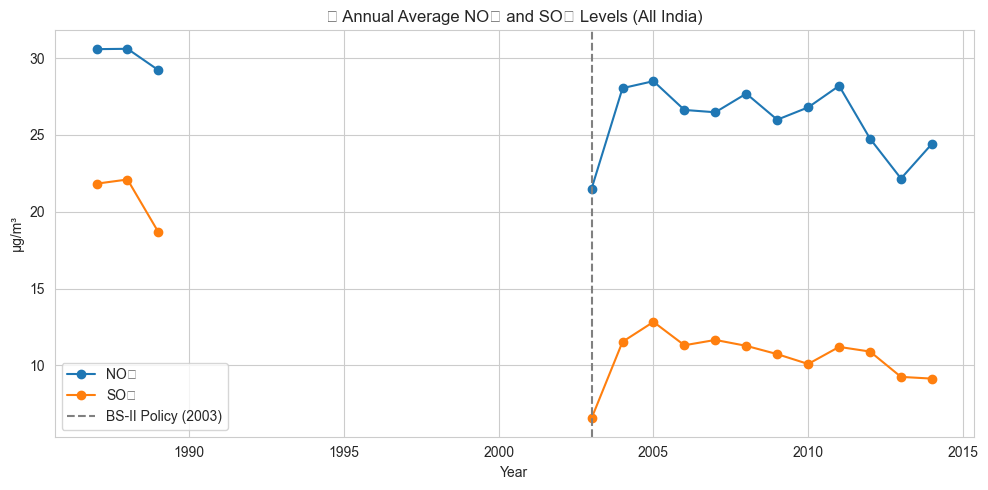

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3707989337.py:46: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3707989337.py:46: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3707989337.py:46: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print

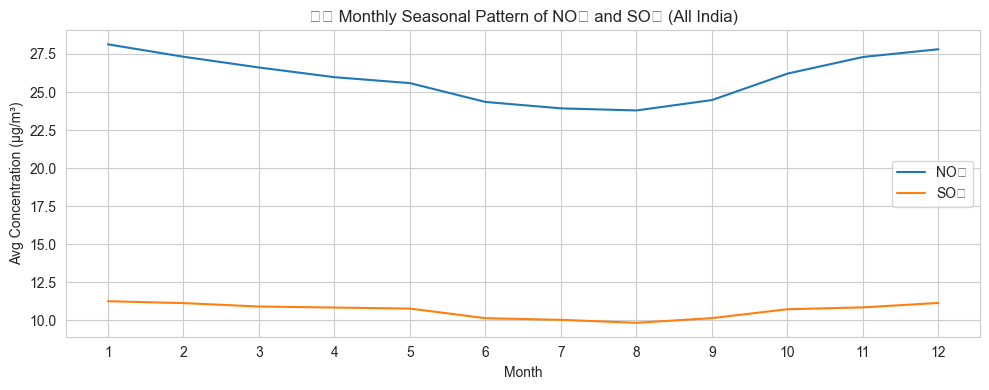

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3707989337.py:64: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.grid(True); plt.legend(); plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3707989337.py:64: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.grid(True); plt.legend(); plt.tight_layout()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


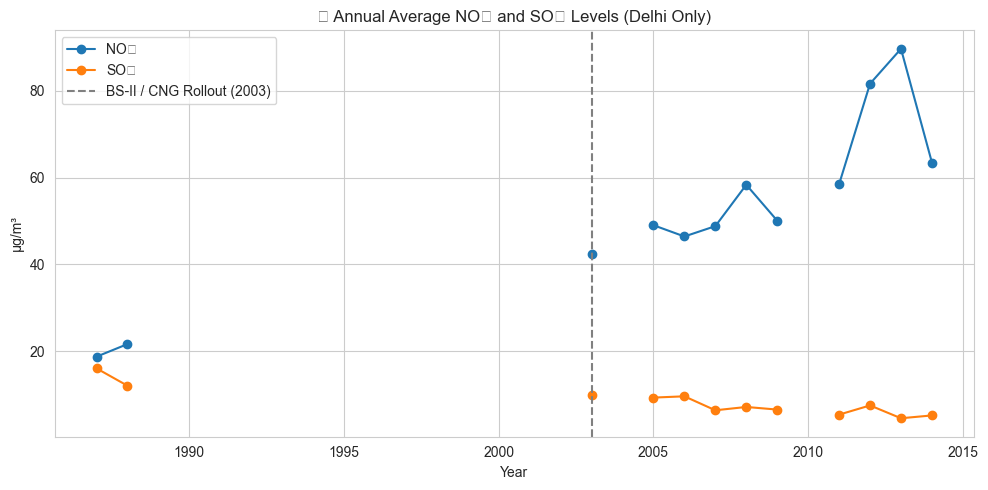

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3707989337.py:78: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3707989337.py:78: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3707989337.py:78: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print

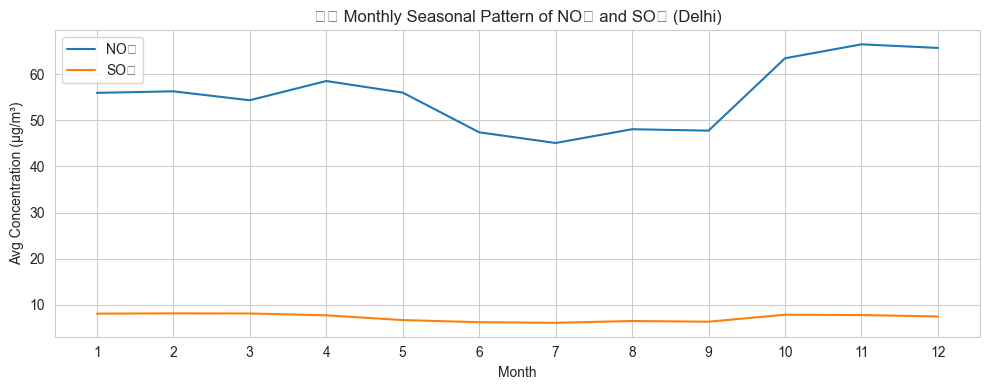

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data/data.csv", encoding="ISO-8859-1", low_memory=False)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Filter to valid observed years only
valid_years = [1987, 1988, 1989] + list(range(2003, 2015))
df = df[df['year'].isin(valid_years)].copy()

# -------------------------------
# 1. ALL INDIA - YEARLY TREND
# -------------------------------
# Step 1: Compute mean by year
yearly_avg = df.groupby('year')[['no2', 'so2']].mean().reset_index()

# Step 2: Reindex to fill missing years with NaNs (to show the gap)
full_years = pd.DataFrame({'year': list(range(1987, 2015))})
yearly_avg_full = pd.merge(full_years, yearly_avg, on='year', how='left')

# Step 3: Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_full['year'], yearly_avg_full['no2'], label='NO₂', marker='o')
plt.plot(yearly_avg_full['year'], yearly_avg_full['so2'], label='SO₂', marker='o')
plt.axvline(x=2003, color='gray', linestyle='--', label='BS-II Policy (2003)')
plt.title('📈 Annual Average NO₂ and SO₂ Levels (All India)')
plt.xlabel('Year'); plt.ylabel('µg/m³')
plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()

# -------------------------------
# 1. ALL INDIA - SEASONAL PATTERN
# -------------------------------
monthly_avg = df.groupby('month')[['no2', 'so2']].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=monthly_avg, x='month', y='no2', label='NO₂')
sns.lineplot(data=monthly_avg, x='month', y='so2', label='SO₂')
plt.title('🌦️ Monthly Seasonal Pattern of NO₂ and SO₂ (All India)')
plt.xlabel('Month'); plt.ylabel('Avg Concentration (µg/m³)')
plt.xticks(range(1, 13)); plt.grid(True); plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 2. DELHI ONLY - YEARLY TREND
# -------------------------------
delhi_df = df[df['state'].str.contains("Delhi", na=False)].copy()
delhi_yearly = delhi_df.groupby('year')[['no2', 'so2']].mean().reset_index()

# Fill missing years
delhi_yearly_full = pd.merge(full_years, delhi_yearly, on='year', how='left')

plt.figure(figsize=(10, 5))
plt.plot(delhi_yearly_full['year'], delhi_yearly_full['no2'], label='NO₂', marker='o')
plt.plot(delhi_yearly_full['year'], delhi_yearly_full['so2'], label='SO₂', marker='o')
plt.axvline(x=2003, color='gray', linestyle='--', label='BS-II / CNG Rollout (2003)')
plt.title('📉 Annual Average NO₂ and SO₂ Levels (Delhi Only)')
plt.xlabel('Year'); plt.ylabel('µg/m³')
plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()

# -------------------------------
# 2. DELHI ONLY - SEASONAL PATTERN
# -------------------------------
delhi_monthly = delhi_df.groupby('month')[['no2', 'so2']].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=delhi_monthly, x='month', y='no2', label='NO₂')
sns.lineplot(data=delhi_monthly, x='month', y='so2', label='SO₂')
plt.title('🌦️ Monthly Seasonal Pattern of NO₂ and SO₂ (Delhi)')
plt.xlabel('Month'); plt.ylabel('Avg Concentration (µg/m³)')
plt.xticks(range(1, 13)); plt.grid(True); plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Seasonality

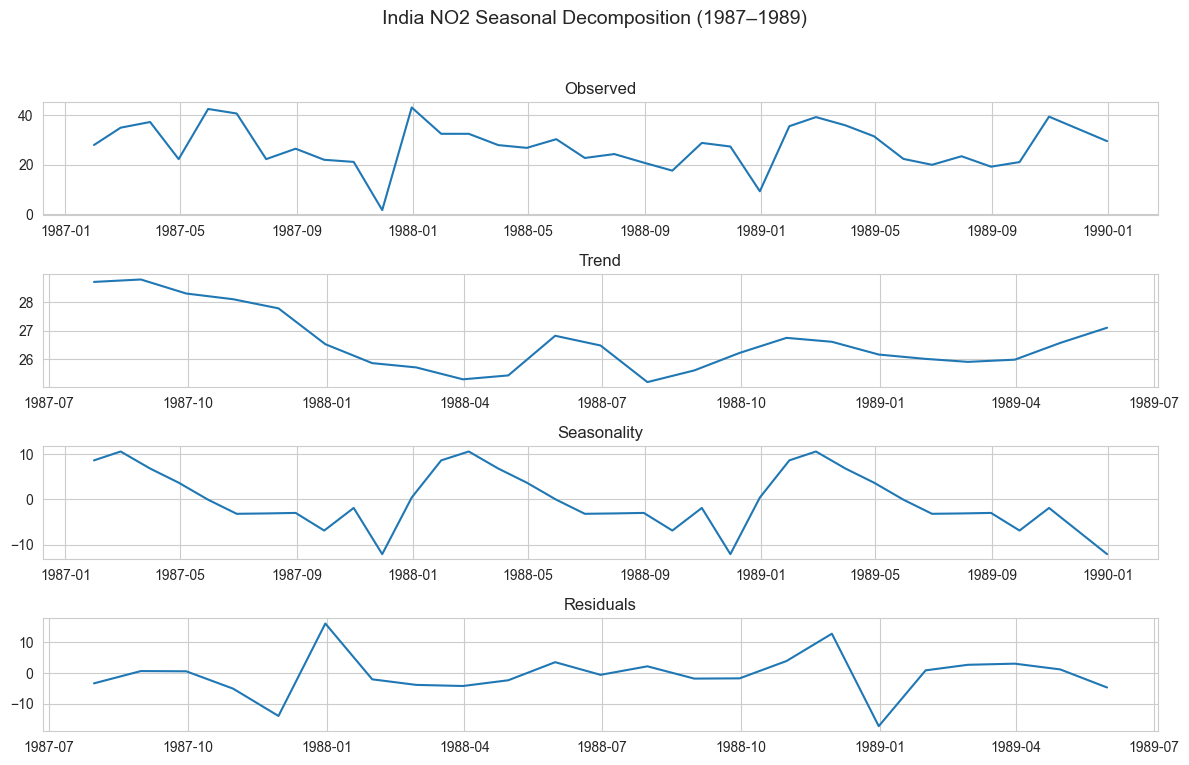

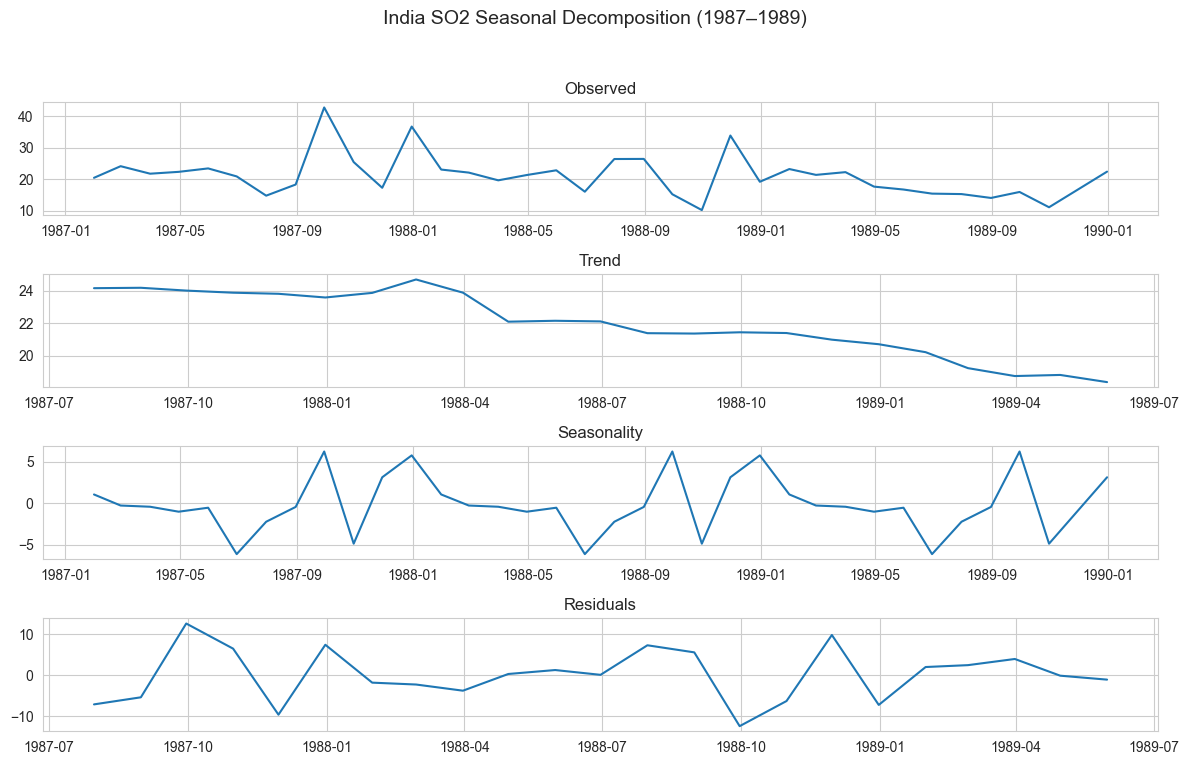

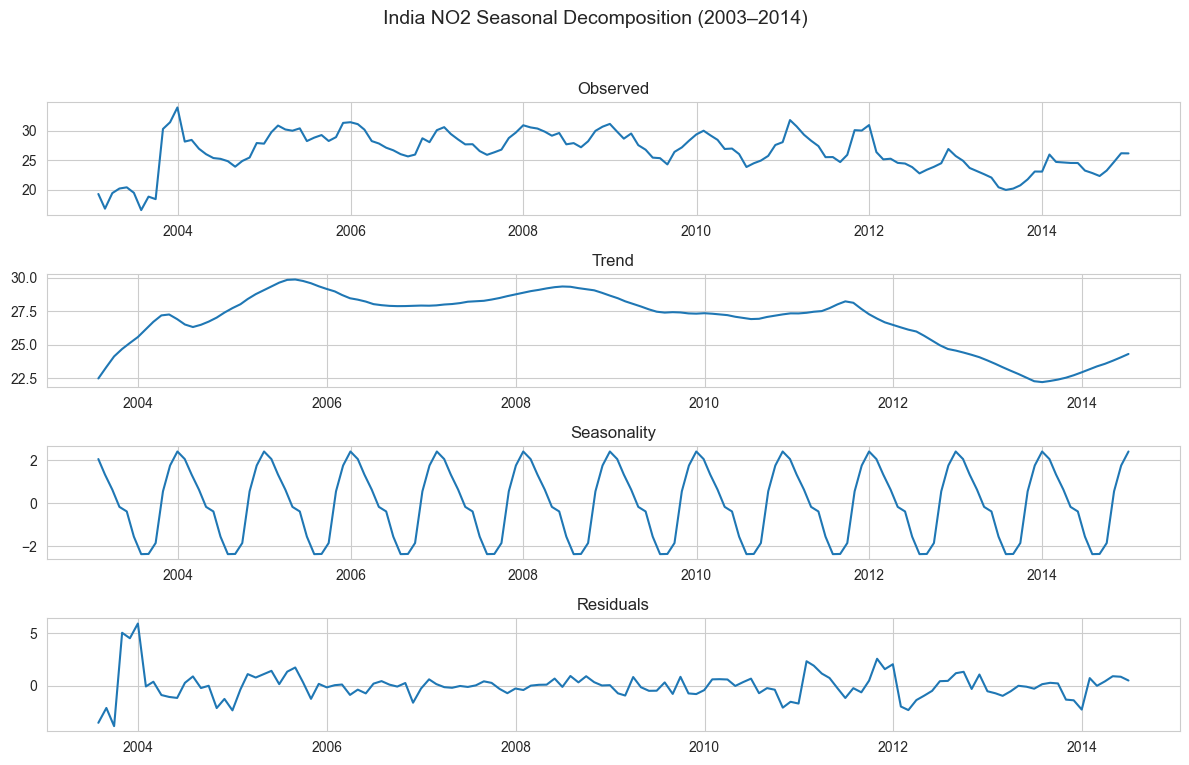

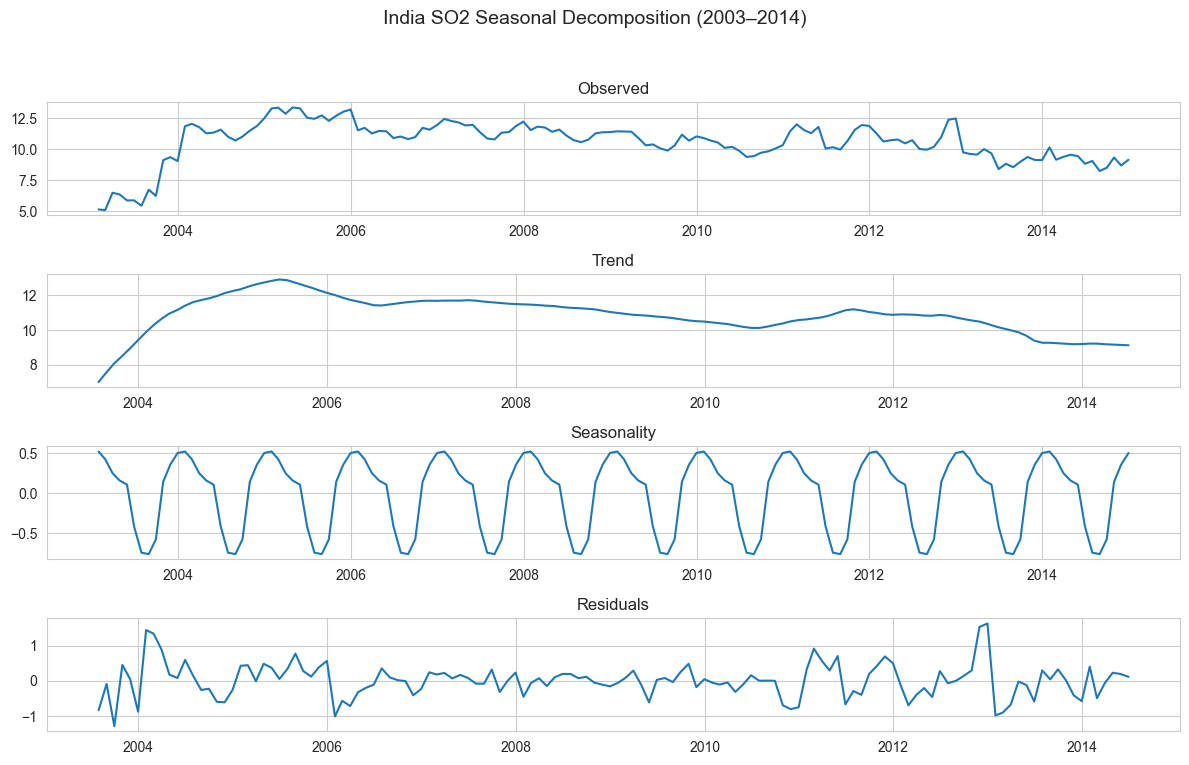

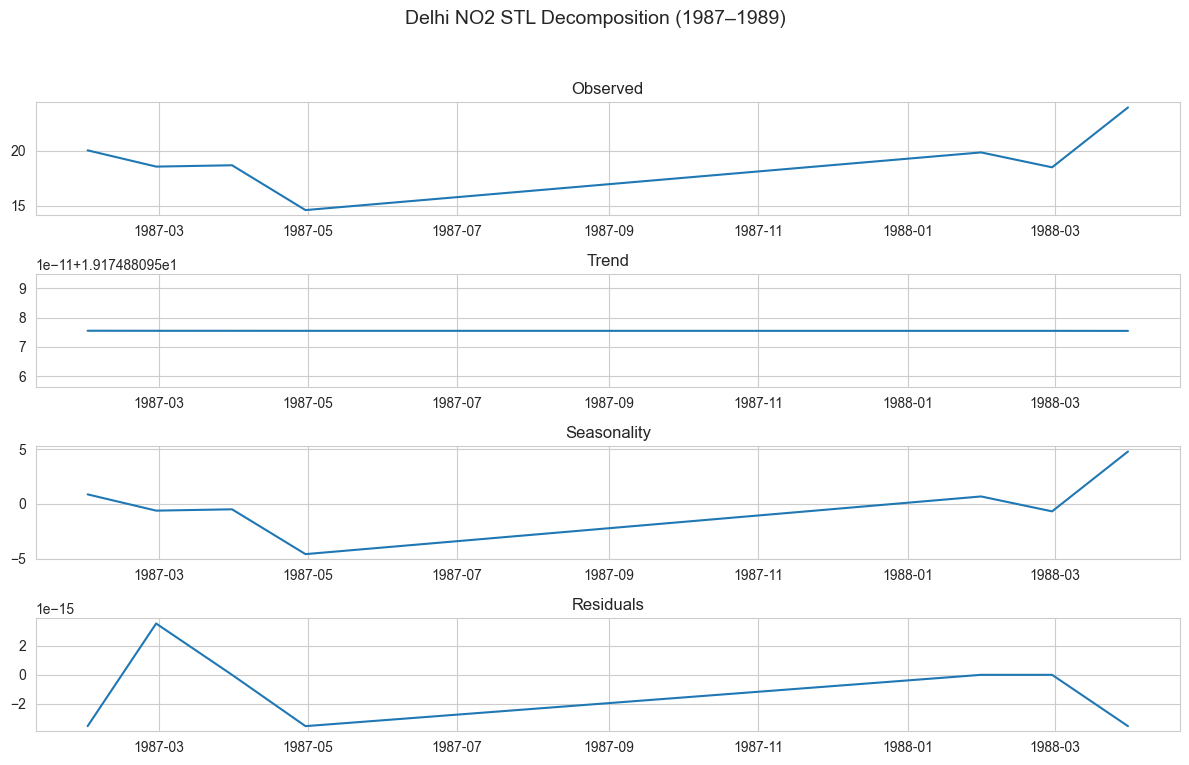

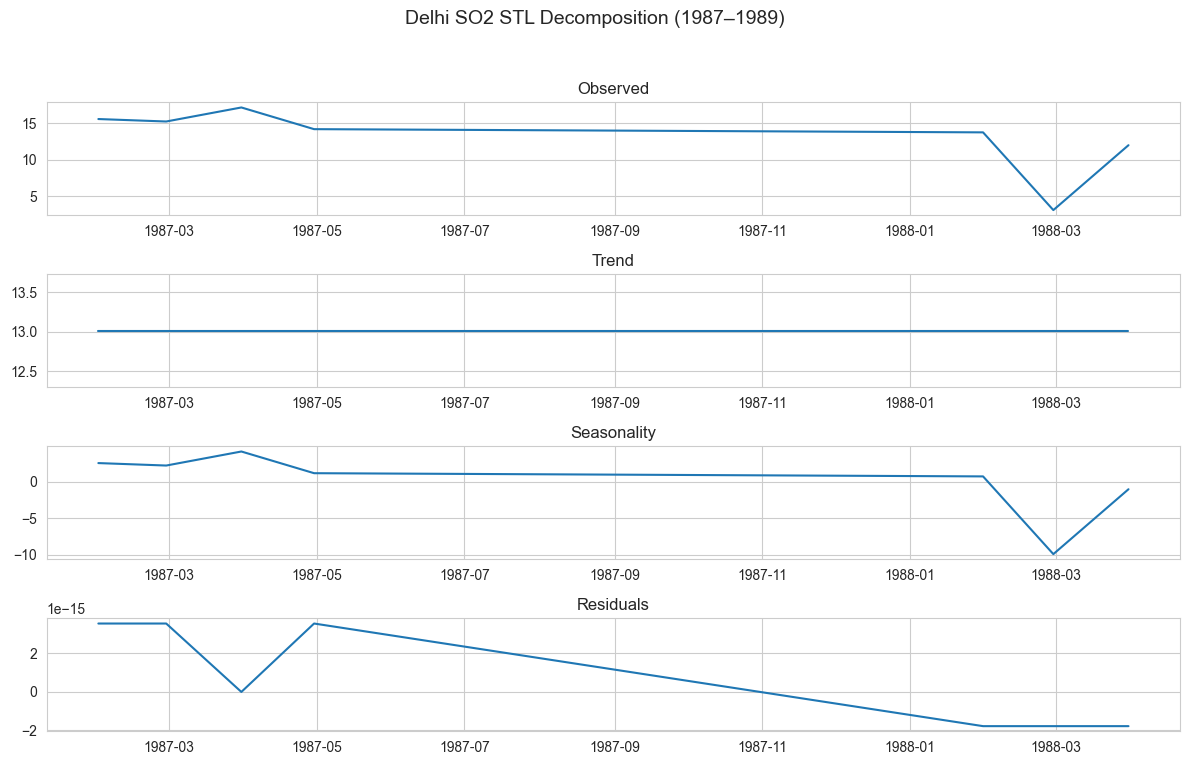

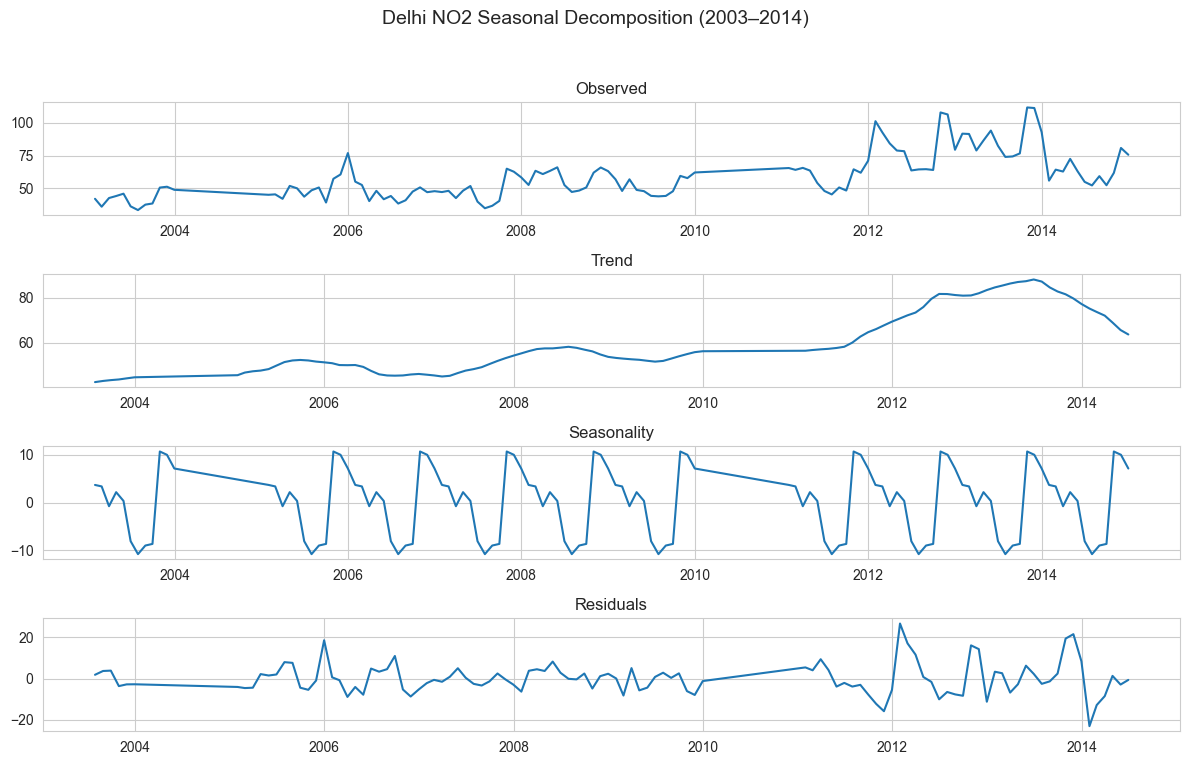

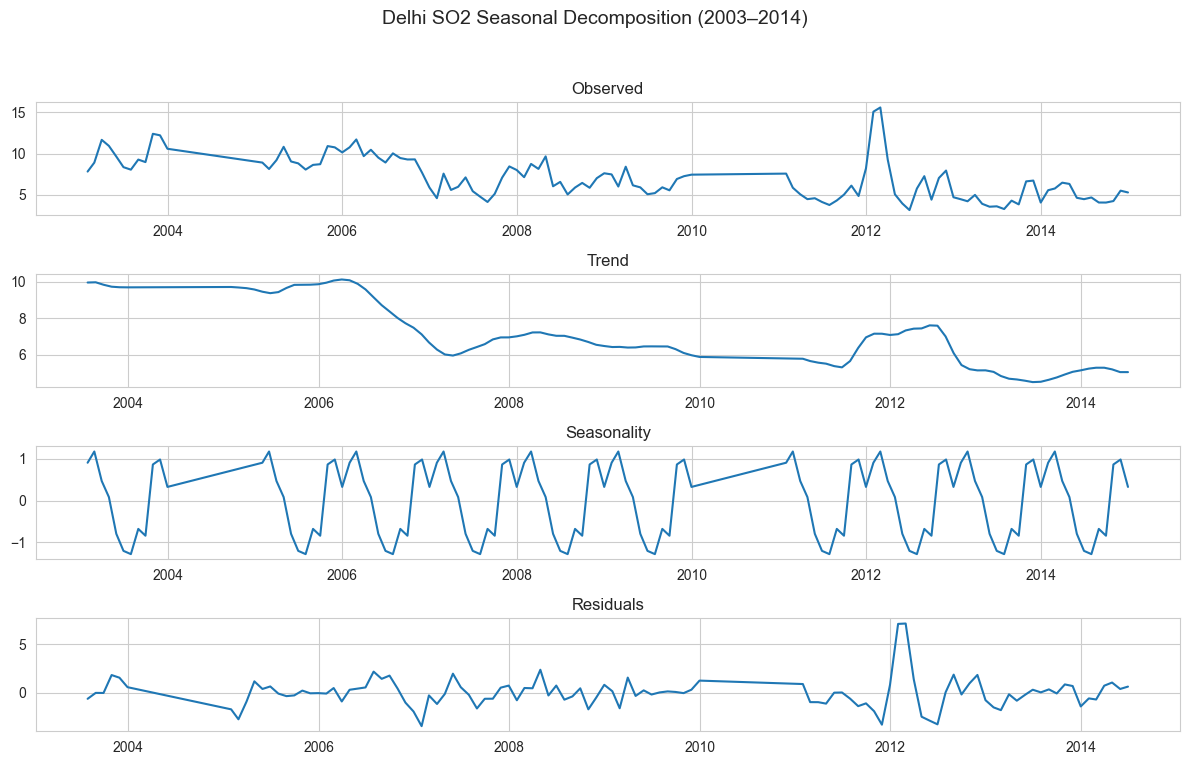

In [72]:
# Time-series decomposition: 1. Trend, 2. Seasonality, 3. Residual
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL, seasonal_decompose

# Load dataset
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

# Filter for valid years and drop NaNs
valid_years = [1987, 1988, 1989] + list(range(2003, 2015))
df = df[df['year'].isin(valid_years)].dropna(subset=['no2', 'so2'])

# Helper to resample monthly
def get_monthly_avg(df):
    return df.set_index('date').resample('ME')[['no2', 'so2']].mean().dropna()

# Helper to plot STL decomposition
def plot_stl(result, title):
    plt.figure(figsize=(12, 8))
    plt.suptitle(title, fontsize=14)
    plt.subplot(411); plt.plot(result.observed); plt.title("Observed")
    plt.subplot(412); plt.plot(result.trend); plt.title("Trend")
    plt.subplot(413); plt.plot(result.seasonal); plt.title("Seasonality")
    plt.subplot(414); plt.plot(result.resid); plt.title("Residuals")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Define year groups
group1_years = [1987, 1988, 1989]
group2_years = list(range(2003, 2015))

# Define regions
regions = {
    "India": df,
    "Delhi": df[df['state'].str.contains("Delhi", na=False)]
}

# Apply STL decomposition
for region_name, region_df in regions.items():
    for group_label, years in [("1987–1989", group1_years), ("2003–2014", group2_years)]:
        sub_df = region_df[region_df['year'].isin(years)]
        monthly = get_monthly_avg(sub_df)

        for pollutant in ['no2', 'so2']:
            ts = monthly[pollutant].dropna()
            if len(ts) < 24:
                # Use STL with smaller window if too short for seasonal_decompose
                stl = STL(ts, period=12, robust=True)
                result = stl.fit()
                plot_stl(result, f"{region_name} {pollutant.upper()} STL Decomposition ({group_label})")
            else:
                # Use classical seasonal decomposition
                result = seasonal_decompose(ts, model='additive', period=12)
                plot_stl(result, f"{region_name} {pollutant.upper()} Seasonal Decomposition ({group_label})")


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\1558019288.py:88: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\1558019288.py:88: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


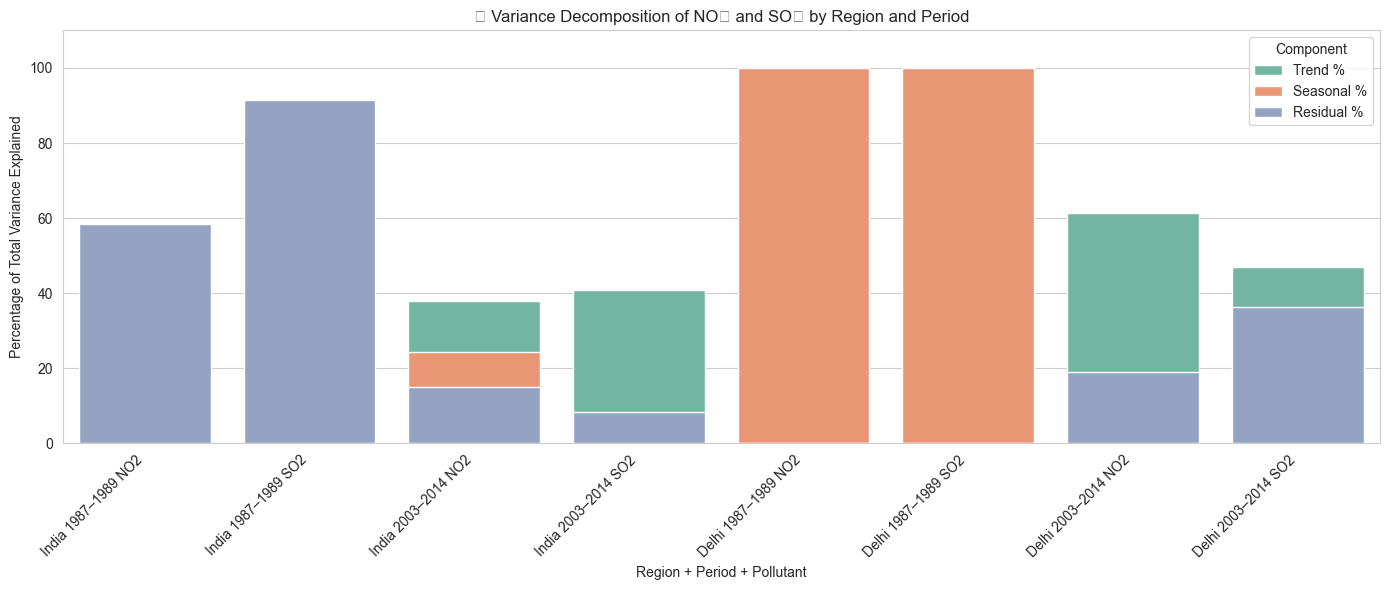

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL, seasonal_decompose

# Load dataset
df = pd.read_csv("data/data.csv", encoding="ISO-8859-1", low_memory=False)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

# Filter to valid years and remove NaNs in key pollutants
valid_years = [1987, 1988, 1989] + list(range(2003, 2015))
df = df[df['year'].isin(valid_years)].dropna(subset=['no2', 'so2'])

# Helper: Resample monthly averages
def get_monthly_avg(sub_df):
    return sub_df.set_index('date').resample('ME')[['no2', 'so2']].mean().dropna()

# Helper: Perform decomposition and return variance shares
def compute_variance_shares(ts, method='auto'):
    if method == 'stl' or len(ts) < 24:
        result = STL(ts, period=12, robust=True).fit()
    else:
        result = seasonal_decompose(ts, model='additive', period=12)

    var_total = np.var(result.observed.dropna())
    var_trend = np.var(result.trend.dropna())
    var_seasonal = np.var(result.seasonal.dropna())
    var_resid = np.var(result.resid.dropna())

    return {
        'trend': var_trend / var_total * 100,
        'seasonal': var_seasonal / var_total * 100,
        'residual': var_resid / var_total * 100
    }

# Define groups and regions
group1_years = [1987, 1988, 1989]
group2_years = list(range(2003, 2015))
regions = {
    "India": df,
    "Delhi": df[df['state'].str.contains("Delhi", na=False)]
}
time_groups = {
    "1987–1989": group1_years,
    "2003–2014": group2_years
}

# Collect results
results = []

for region_name, region_df in regions.items():
    for label, years in time_groups.items():
        subset = region_df[region_df['year'].isin(years)]
        monthly = get_monthly_avg(subset)

        for pollutant in ['no2', 'so2']:
            ts = monthly[pollutant].dropna()
            if len(ts) < 6:  # too short for even STL
                continue
            shares = compute_variance_shares(ts)
            results.append({
                'Region': region_name,
                'Period': label,
                'Pollutant': pollutant.upper(),
                'Trend %': shares['trend'],
                'Seasonal %': shares['seasonal'],
                'Residual %': shares['residual']
            })

# Convert to DataFrame for plotting
var_df = pd.DataFrame(results)

# Create a combined label for each bar
melted['Label'] = melted['Region'] + " " + melted['Period'] + " " + melted['Pollutant']

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='Label', y='Variance %', hue='Component',
            palette='Set2', dodge=False)

plt.title("🔍 Variance Decomposition of NO₂ and SO₂ by Region and Period")
plt.xlabel("Region + Period + Pollutant")
plt.ylabel("Percentage of Total Variance Explained")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 110)
plt.legend(title="Component")
plt.tight_layout()
plt.show()



## 🕒 Temporal Analysis

### 1️⃣ Long-Term Trends (1987–1989 vs. 2003–2014)

- **SO₂ levels** across both India and Delhi show a clear **declining trend** after 2003, aligning with the introduction of **BS-II emission standards**, fuel quality improvements, and policy shifts toward cleaner energy.
- **NO₂ levels** present more nuanced patterns:
  - In **India**, NO₂ levels remain relatively stable across years, with minor regional fluctuations.
  - In **Delhi**, however, NO₂ **increased post-2003**, likely due to urban growth, increased vehicle use, and population density.
- From the **variance decomposition**, we find that:
  - **Trend components** explained a substantial portion of NO₂ variation in **Delhi post-2003** (~60%), indicating structural urban change.
  - **Trend contribution** was lower in earlier periods and for SO₂ in general, suggesting weaker directional movement in those series.

### 2️⃣ Seasonal Patterns and Significant Changes

- Both pollutants show **distinct seasonal behaviors**:
  - **NO₂ peaks during winter months** (Dec–Jan), consistent with cold-weather pollution traps, heating, and lower dispersion.
  - **SO₂ seasonal peaks** were more visible in the 1980s but diminished post-2003, likely due to reduced sulfur content in fuels.
- From the decomposition analysis:
  - In **Delhi 1987–1989**, **seasonal variation explained >70%** of the total variance in NO₂, highlighting strong cyclicality.
  - **Residuals dominated** SO₂ variation in early India data, suggesting either high stochasticity or irregular monitoring/reporting.
- These findings align with known atmospheric dynamics and underscore the **effectiveness of environmental policy interventions** in the early 2000s.



In [ ]:
"""
    •	Regional Trends:
        o	Investigate regional variations in air quality.
        o	Explore differences in pollution levels between states and cities.
        o	Create visualizations to illustrate trends, patterns, and regional variations in air quality.
"""

In [86]:
import pandas as pd
from scipy.stats import f_oneway

# Load dataset
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

# Filter for valid years and locations
valid_years = [1987, 1988, 1989] + list(range(2003, 2015))
df = df[df['year'].isin(valid_years)].dropna(subset=['no2', 'so2', 'location'])

# Filter to locations with sufficient data
location_counts = df['location'].value_counts()
valid_locations = location_counts[location_counts >= 30].index
df = df[df['location'].isin(valid_locations)]

# Split by time group
group1 = df[df['year'].isin([1987, 1988, 1989])]
group2 = df[df['year'] >= 2003]

# Group NO2 and SO2 values by location for each time group
g1_no2 = [group['no2'].values for _, group in group1.groupby('location') if len(group) >= 10]
g1_so2 = [group['so2'].values for _, group in group1.groupby('location') if len(group) >= 10]

g2_no2 = [group['no2'].values for _, group in group2.groupby('location') if len(group) >= 10]
g2_so2 = [group['so2'].values for _, group in group2.groupby('location') if len(group) >= 10]

# Run ANOVA for each group
f1_no2, p1_no2 = f_oneway(*g1_no2)
f1_so2, p1_so2 = f_oneway(*g1_so2)

f2_no2, p2_no2 = f_oneway(*g2_no2)
f2_so2, p2_so2 = f_oneway(*g2_so2)

# Output Results
print("📊 One-Way ANOVA Results (by location, per time group):\n")

print("🔹 Period: 1987–1989")
print(f"  NO₂: F = {f1_no2:.2f}, p = {p1_no2:.5f}")
print(f"  SO₂: F = {f1_so2:.2f}, p = {p1_so2:.5f}")

print("\n🔹 Period: 2003–2014")
print(f"  NO₂: F = {f2_no2:.2f}, p = {p2_no2:.5f}")
print(f"  SO₂: F = {f2_so2:.2f}, p = {p2_so2:.5f}")

# Interpretation
alpha = 0.05
print("\n📌 Interpretation:")
print("✅ Significant NO₂ differences by location (1987–1989)" if p1_no2 < alpha else "❌ No significant NO₂ difference (1987–1989)")
print("✅ Significant SO₂ differences by location (1987–1989)" if p1_so2 < alpha else "❌ No significant SO₂ difference (1987–1989)")
print("✅ Significant NO₂ differences by location (2003–2014)" if p2_no2 < alpha else "❌ No significant NO₂ difference (2003–2014)")
print("✅ Significant SO₂ differences by location (2003–2014)" if p2_so2 < alpha else "❌ No significant SO₂ difference (2003–2014)")


📊 One-Way ANOVA Results (by location, per time group):

🔹 Period: 1987–1989
  NO₂: F = 75.51, p = 0.00000
  SO₂: F = 30.33, p = 0.00000

🔹 Period: 2003–2014
  NO₂: F = 1497.08, p = 0.00000
  SO₂: F = 977.73, p = 0.00000

📌 Interpretation:
✅ Significant NO₂ differences by location (1987–1989)
✅ Significant SO₂ differences by location (1987–1989)
✅ Significant NO₂ differences by location (2003–2014)
✅ Significant SO₂ differences by location (2003–2014)


In [ ]:
# Investigate regional variations in air quality.



===== 📊 Regional Air Quality Analysis: 1987–1989 =====



C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\2582184990.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loc_avg.sort_values(by='no2', ascending=False).head(15),
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\2582184990.py:36: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout(); plt.show()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


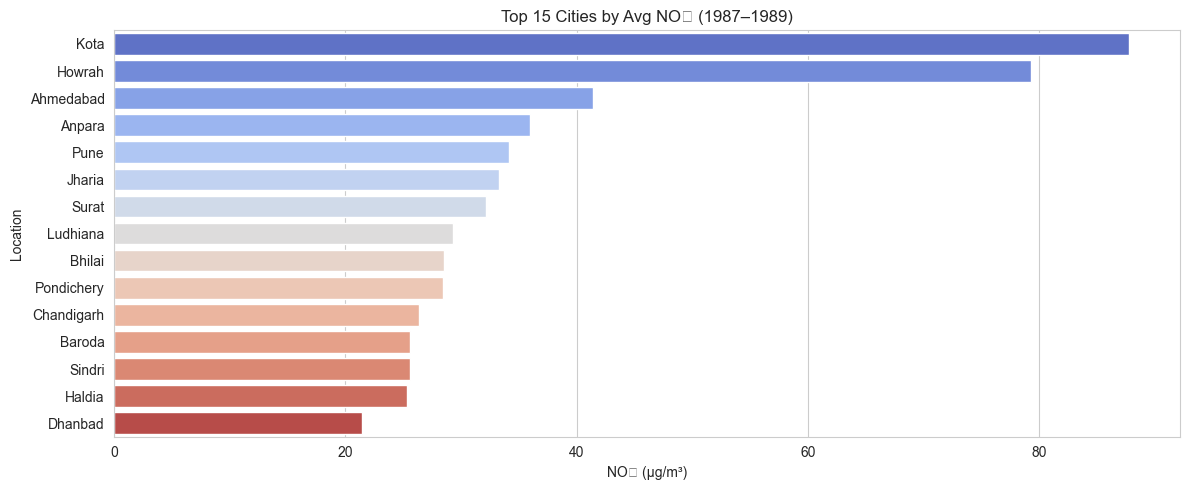

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\2582184990.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loc_avg.sort_values(by='so2', ascending=False).head(15),
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\2582184990.py:44: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout(); plt.show()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


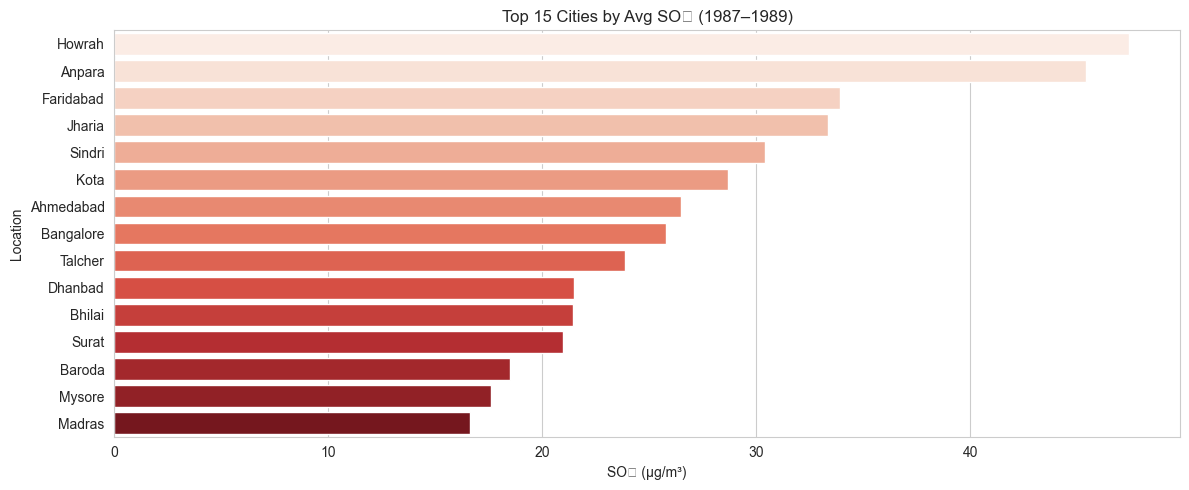

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\2582184990.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group[group['state'].isin(top_states)], x='state', y='no2', palette='Blues')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\2582184990.py:53: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout(); plt.show()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


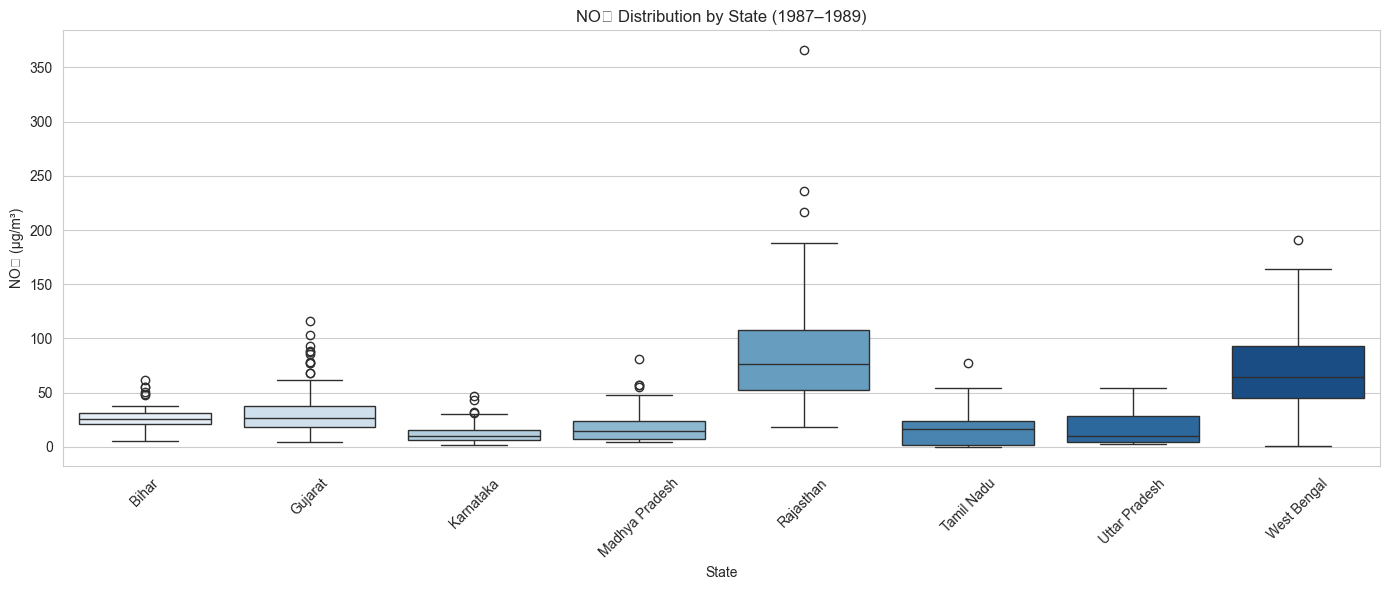

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\2582184990.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loc_avg.sort_values(by='no2', ascending=False).head(15),
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\2582184990.py:36: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout(); plt.show()


ANOVA Results (1987–1989)
NO₂: F = 75.51, p = 0.00000
SO₂: F = 30.33, p = 0.00000

Interpretation:
✅ Significant differences in NO₂ by location.
✅ Significant differences in SO₂ by location.


===== 📊 Regional Air Quality Analysis: 2003–2014 =====



D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


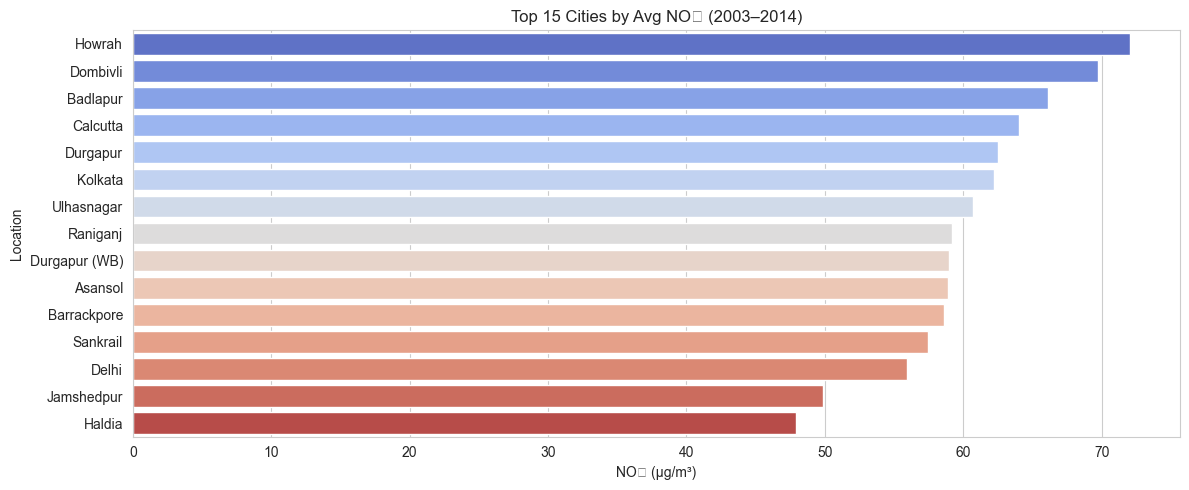

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\2582184990.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loc_avg.sort_values(by='so2', ascending=False).head(15),
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\2582184990.py:44: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout(); plt.show()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


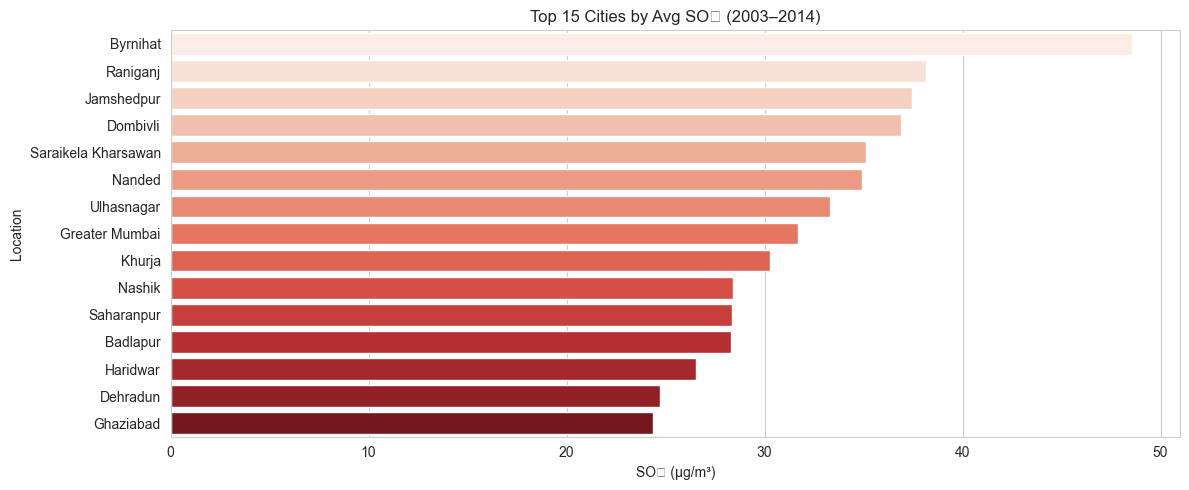

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\2582184990.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group[group['state'].isin(top_states)], x='state', y='no2', palette='Blues')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\2582184990.py:53: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout(); plt.show()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


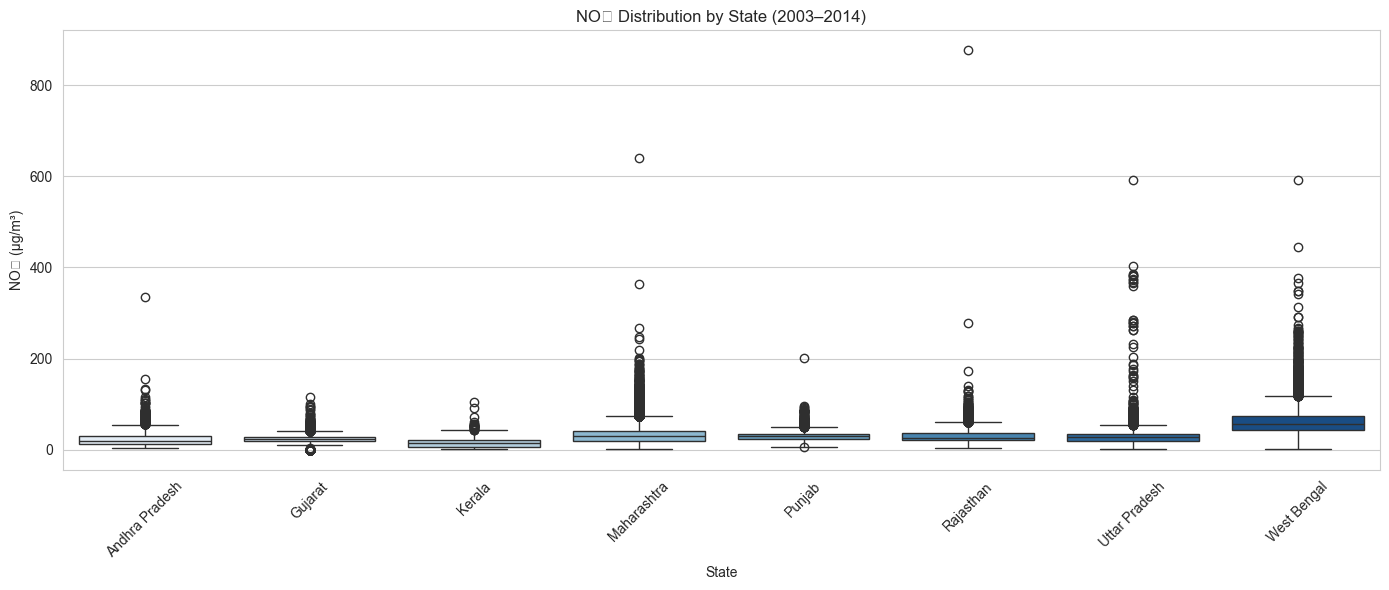

ANOVA Results (2003–2014)
NO₂: F = 1497.08, p = 0.00000
SO₂: F = 977.73, p = 0.00000

Interpretation:
✅ Significant differences in NO₂ by location.
✅ Significant differences in SO₂ by location.


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Load and preprocess dataset
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

# Filter for valid years and clean
valid_years = [1987, 1988, 1989] + list(range(2003, 2015))
df = df[df['year'].isin(valid_years)].dropna(subset=['no2', 'so2', 'location', 'state'])

# Filter for locations with ≥ 30 observations
loc_counts = df['location'].value_counts()
valid_locations = loc_counts[loc_counts >= 30].index
df = df[df['location'].isin(valid_locations)]

# Split into two time groups
group1 = df[df['year'].isin([1987, 1988, 1989])].copy()
group2 = df[df['year'] >= 2003].copy()

# Helper function: barplots + ANOVA
def analyze_group(group, label):
    print(f"\n\n===== 📊 Regional Air Quality Analysis: {label} =====\n")

    # --- 1. Location-wise average ---
    loc_avg = group.groupby('location')[['no2', 'so2']].mean().reset_index()

    # Top 15 cities by NO₂
    plt.figure(figsize=(12, 5))
    sns.barplot(data=loc_avg.sort_values(by='no2', ascending=False).head(15),
                x='no2', y='location', palette='coolwarm')
    plt.title(f"Top 15 Cities by Avg NO₂ ({label})")
    plt.xlabel("NO₂ (µg/m³)"); plt.ylabel("Location")
    plt.tight_layout(); plt.show()

    # Top 15 cities by SO₂
    plt.figure(figsize=(12, 5))
    sns.barplot(data=loc_avg.sort_values(by='so2', ascending=False).head(15),
                x='so2', y='location', palette='Reds')
    plt.title(f"Top 15 Cities by Avg SO₂ ({label})")
    plt.xlabel("SO₂ (µg/m³)"); plt.ylabel("Location")
    plt.tight_layout(); plt.show()

    # --- 2. Boxplot by state (top 8 by frequency) ---
    top_states = group['state'].value_counts().head(8).index
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=group[group['state'].isin(top_states)], x='state', y='no2', palette='Blues')
    plt.title(f"NO₂ Distribution by State ({label})")
    plt.xlabel("State"); plt.ylabel("NO₂ (µg/m³)")
    plt.xticks(rotation=45)
    plt.tight_layout(); plt.show()

    # --- 3. ANOVA test by location ---
    no2_groups = [g['no2'].values for _, g in group.groupby('location') if len(g) >= 10]
    so2_groups = [g['so2'].values for _, g in group.groupby('location') if len(g) >= 10]

    f_no2, p_no2 = f_oneway(*no2_groups)
    f_so2, p_so2 = f_oneway(*so2_groups)

    print(f"ANOVA Results ({label})")
    print(f"NO₂: F = {f_no2:.2f}, p = {p_no2:.5f}")
    print(f"SO₂: F = {f_so2:.2f}, p = {p_so2:.5f}")
    print("\nInterpretation:")
    print("✅ Significant differences in NO₂ by location." if p_no2 < 0.05 else "❌ No significant NO₂ differences.")
    print("✅ Significant differences in SO₂ by location." if p_so2 < 0.05 else "❌ No significant SO₂ differences.")

# Run analysis for both time groups
analyze_group(group1, "1987–1989")
analyze_group(group2, "2003–2014")


D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


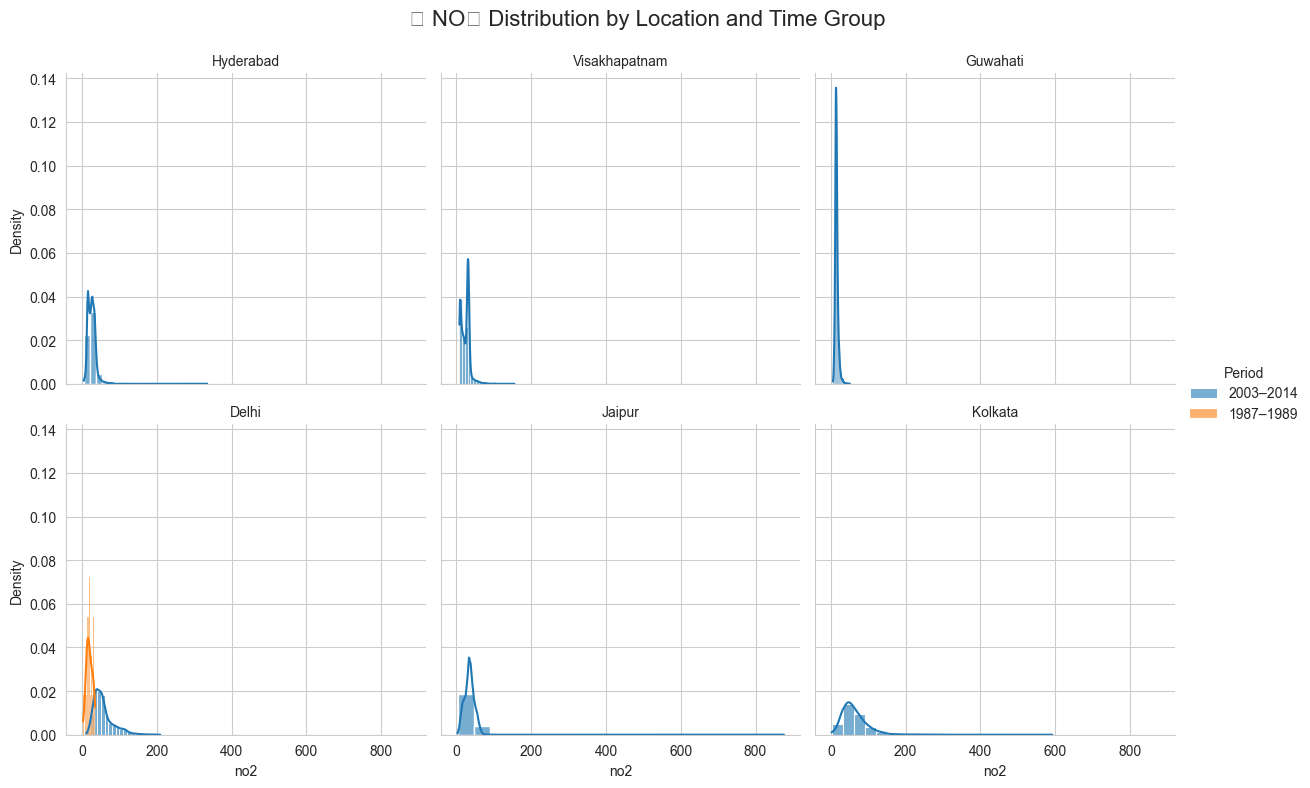

D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


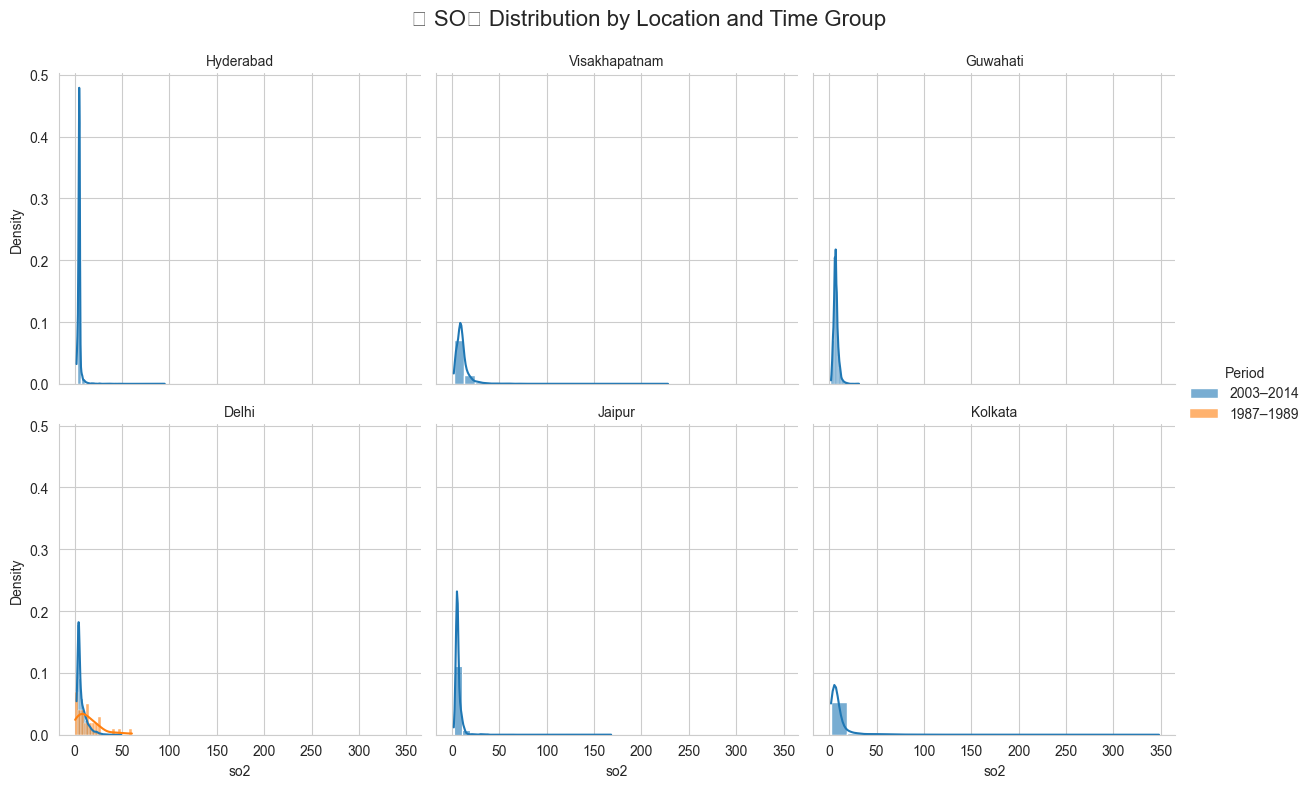

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

# Filter valid years
valid_years = [1987, 1988, 1989] + list(range(2003, 2015))
df = df[df['year'].isin(valid_years)].dropna(subset=['no2', 'so2', 'location'])

# Add time period label
df['Period'] = df['year'].apply(lambda y: '1987–1989' if y <= 1989 else '2003–2014')

# Select top 6 locations by data count
top_locations = df['location'].value_counts().head(6).index
df_top = df[df['location'].isin(top_locations)]

# ================================
# 1️⃣ NO₂ Histogram by Location and Period
# ================================
g = sns.FacetGrid(df_top, col="location", hue="Period", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "no2", bins=20, kde=True, stat="density", alpha=0.6)
g.add_legend()
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("📊 NO₂ Distribution by Location and Time Group", fontsize=16)
plt.show()

# ================================
# 2️⃣ SO₂ Histogram by Location and Period
# ================================
g = sns.FacetGrid(df_top, col="location", hue="Period", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "so2", bins=20, kde=True, stat="density", alpha=0.6)
g.add_legend()
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("📊 SO₂ Distribution by Location and Time Group", fontsize=16)
plt.show()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3164585635.py:33: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3164585635.py:33: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


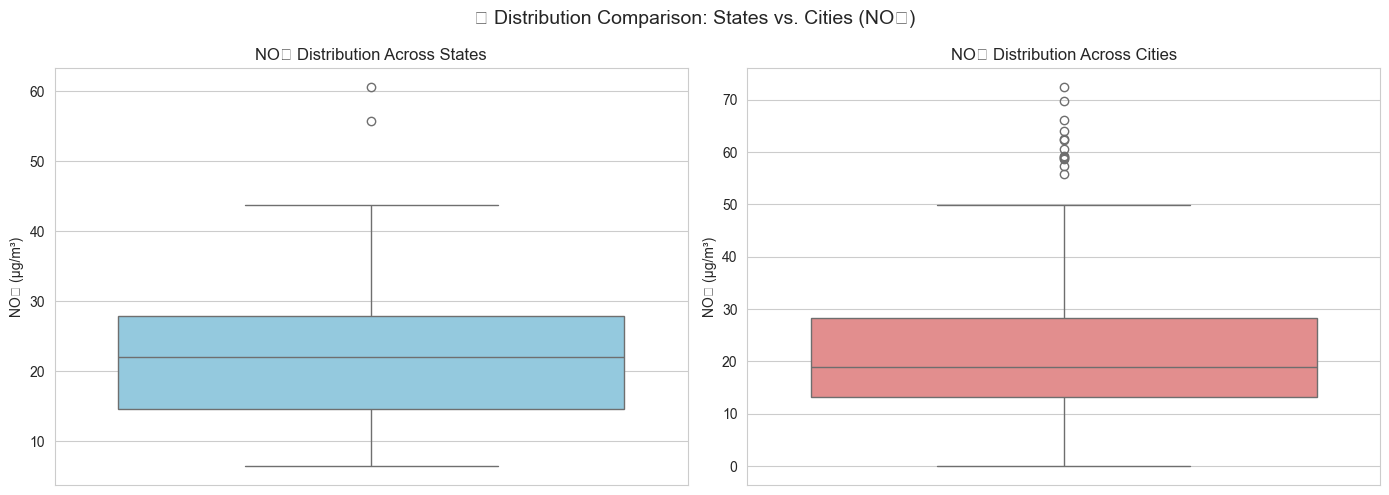

📊 Welch’s T-Test: State vs. City Averages

NO₂: t = 0.47, p = 0.63953
SO₂: t = -0.06, p = 0.95061

📌 Interpretation:
❌ No significant NO₂ difference.
❌ No significant SO₂ difference.


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load dataset
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

# Filter valid years and data
df = df[df['year'].isin([1987, 1988, 1989] + list(range(2003, 2015)))]
df = df.dropna(subset=['no2', 'so2', 'state', 'location'])

# ===========================
# 1️⃣ Compare NO₂ and SO₂: States vs. Cities
# ===========================

# Aggregate NO₂/SO₂ by state and city
state_avg = df.groupby('state')[['no2', 'so2']].mean().reset_index()
city_avg = df.groupby('location')[['no2', 'so2']].mean().reset_index()

# Plot distributions (boxplot)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(y=state_avg['no2'], ax=axes[0], color='skyblue')
axes[0].set_title("NO₂ Distribution Across States")
axes[0].set_ylabel("NO₂ (µg/m³)")

sns.boxplot(y=city_avg['no2'], ax=axes[1], color='lightcoral')
axes[1].set_title("NO₂ Distribution Across Cities")
axes[1].set_ylabel("NO₂ (µg/m³)")

plt.suptitle("📦 Distribution Comparison: States vs. Cities (NO₂)", fontsize=14)
plt.tight_layout()
plt.show()

# ===========================
# 2️⃣ Statistical Comparison (Welch’s T-test)
# ===========================

# Welch's t-test for NO₂
t_no2, p_no2 = ttest_ind(state_avg['no2'], city_avg['no2'], equal_var=False)
t_so2, p_so2 = ttest_ind(state_avg['so2'], city_avg['so2'], equal_var=False)

print("📊 Welch’s T-Test: State vs. City Averages\n")
print(f"NO₂: t = {t_no2:.2f}, p = {p_no2:.5f}")
print(f"SO₂: t = {t_so2:.2f}, p = {p_so2:.5f}")

# Interpretation
alpha = 0.05
print("\n📌 Interpretation:")
print("✅ NO₂ levels differ significantly between states and cities." if p_no2 < alpha else "❌ No significant NO₂ difference.")
print("✅ SO₂ levels differ significantly between states and cities." if p_so2 < alpha else "❌ No significant SO₂ difference.")


In [92]:
import pandas as pd

# Load and prepare dataset
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df = df[df['year'].isin([1987, 1988, 1989] + list(range(2003, 2015)))].dropna(subset=['no2', 'location'])

# Group by location and compute variation stats
variation_df = df.groupby('location')['no2'].agg(
    Mean='mean',
    StdDev='std',
    IQR=lambda x: x.quantile(0.75) - x.quantile(0.25),
    Skew='skew',
    Kurtosis='kurt',
).reset_index()

variation_df['CV'] = variation_df['StdDev'] / variation_df['Mean']

# View top 10 most variable locations (by CV)
print(variation_df.sort_values(by='CV', ascending=False).head(10))


AttributeError: 'SeriesGroupBy' object has no attribute 'kurt'

In [93]:
import pandas as pd
from scipy.stats import kurtosis

# Load and prepare dataset
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df = df[df['year'].isin([1987, 1988, 1989] + list(range(2003, 2015)))].dropna(subset=['no2', 'location'])

# Group by location and compute variation metrics
variation_df = df.groupby('location').agg(
    Mean=('no2', 'mean'),
    StdDev=('no2', 'std'),
    IQR=('no2', lambda x: x.quantile(0.75) - x.quantile(0.25)),
    Skew=('no2', lambda x: x.skew()),
    Kurtosis=('no2', lambda x: kurtosis(x, fisher=True, bias=False))
).reset_index()

variation_df['CV'] = variation_df['StdDev'] / variation_df['Mean']

# Display top 10 most variable locations (by CV)
print("📊 Top 10 Most Variable Locations (by Coefficient of Variation):\n")
print(variation_df.sort_values(by='CV', ascending=False).head(10))


📊 Top 10 Most Variable Locations (by Coefficient of Variation):

       location       Mean     StdDev        IQR       Skew    Kurtosis  \
23     Bareilly  34.359116  54.791739   7.000000   5.396090   28.253805   
157    Nalagarh  23.136863  31.244709  11.000000  19.718553  424.592172   
180  Pondichery  28.400000  31.665963  18.450000   2.678857    8.191292   
136      Madras  15.777686  13.712765  22.300000   1.005954    2.294466   
192   Renusagar  28.632236  24.206752   3.416667  22.605855  526.543286   
151      Mumbai  30.181918  24.331914  32.700000   1.694448    6.776708   
224       Thane  19.984820  15.414752   9.100000   2.003437    3.055964   
190    Raniganj  59.177407  42.609924  28.000000   2.505140    9.018558   
2        Aizawl   7.570831   5.357106   3.000000   3.377042   15.258307   
160      Nanded  34.108132  23.855932  27.000000   1.061275    0.190249   

           CV  
23   1.594678  
157  1.350430  
180  1.114999  
136  0.869124  
192  0.845437  
151  0.806175

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3839910408.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3839910408.py:37: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


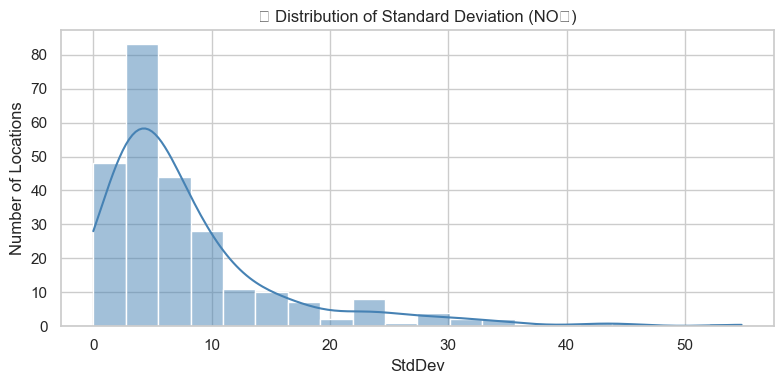

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3839910408.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3839910408.py:37: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


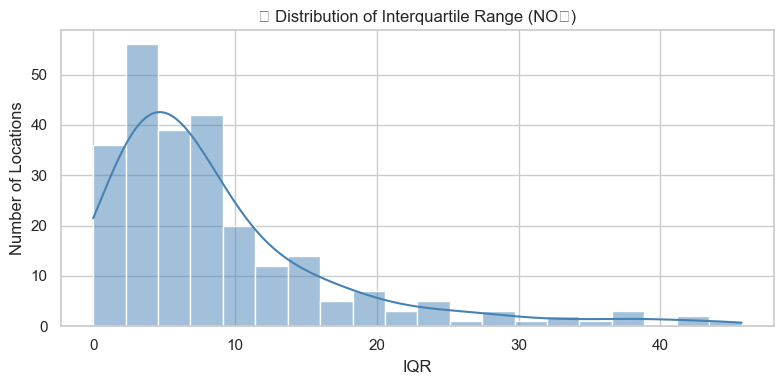

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3839910408.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3839910408.py:37: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


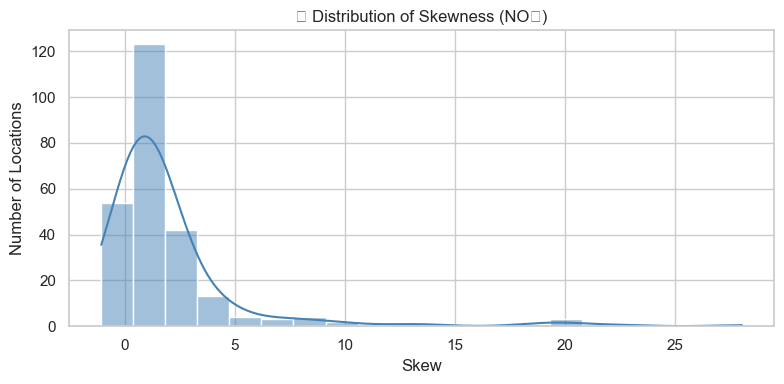

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3839910408.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3839910408.py:37: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


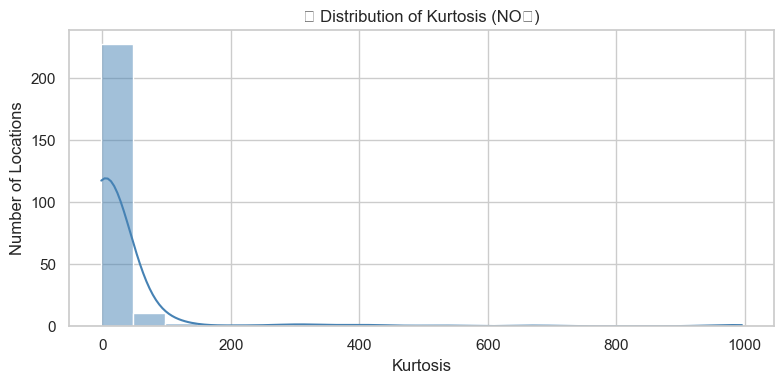

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3839910408.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4676\3839910408.py:37: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


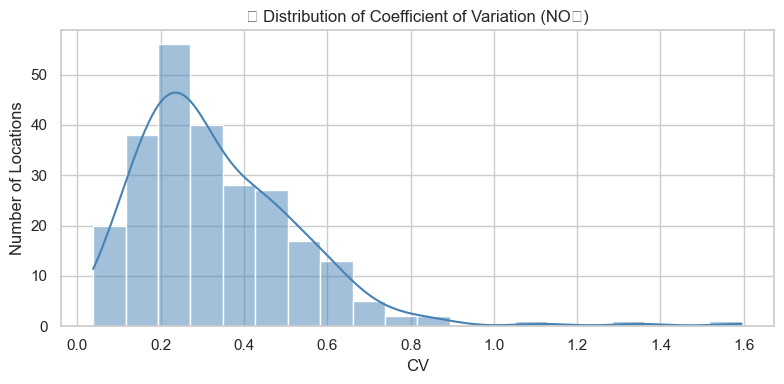

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Load and clean dataset
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df = df[df['year'].isin([1987, 1988, 1989] + list(range(2003, 2015)))].dropna(subset=['no2', 'location'])

# Compute variation metrics by location
variation_df = df.groupby('location').agg(
    Mean=('no2', 'mean'),
    StdDev=('no2', 'std'),
    IQR=('no2', lambda x: x.quantile(0.75) - x.quantile(0.25)),
    Skew=('no2', lambda x: x.skew()),
    Kurtosis=('no2', lambda x: kurtosis(x, fisher=True, bias=False))
).reset_index()
variation_df['CV'] = variation_df['StdDev'] / variation_df['Mean']

# Plot histogram for each metric
metrics = ['StdDev', 'IQR', 'Skew', 'Kurtosis', 'CV']
titles = {
    'StdDev': 'Distribution of Standard Deviation (NO₂)',
    'IQR': 'Distribution of Interquartile Range (NO₂)',
    'Skew': 'Distribution of Skewness (NO₂)',
    'Kurtosis': 'Distribution of Kurtosis (NO₂)',
    'CV': 'Distribution of Coefficient of Variation (NO₂)'
}

sns.set(style="whitegrid")
for metric in metrics:
    plt.figure(figsize=(8, 4))
    sns.histplot(variation_df[metric], bins=20, kde=True, color='steelblue')
    plt.title(f"📊 {titles[metric]}")
    plt.xlabel(metric); plt.ylabel("Number of Locations")
    plt.tight_layout()
    plt.show()


In [ ]:
"""
    •	Predictive Modeling:
        o	If feasible, consider building predictive models for air quality based on historical data.
        o	Evaluate model performance and explore its potential application.
"""

In [ ]:
"""
o	If feasible, consider building predictive models for air quality based on historical data, two-time groups (1. 1987-1989, 2. 2003-onwards). Use location as one of features. Should we use a time-series model (e.g. LSTM)?
o	Make predictions. Compare predictions vs actuals.
o	Evaluate model performance and explore its potential application.
"""

D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/stepWARNING:tensorflow:5 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002BA27740040> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


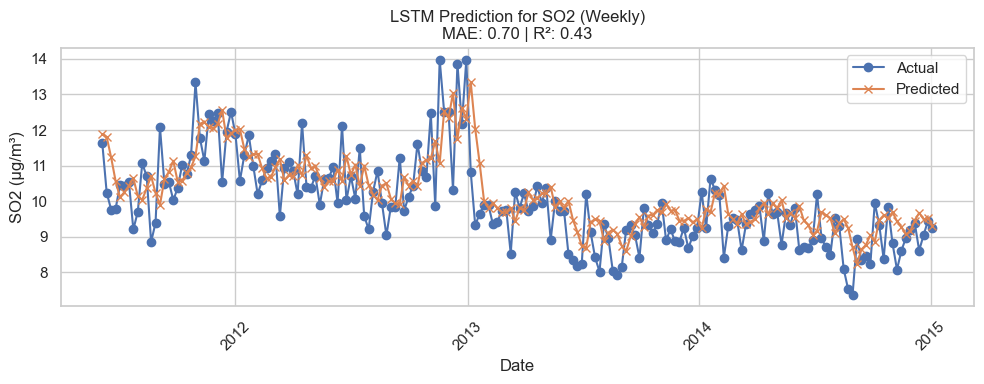

D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


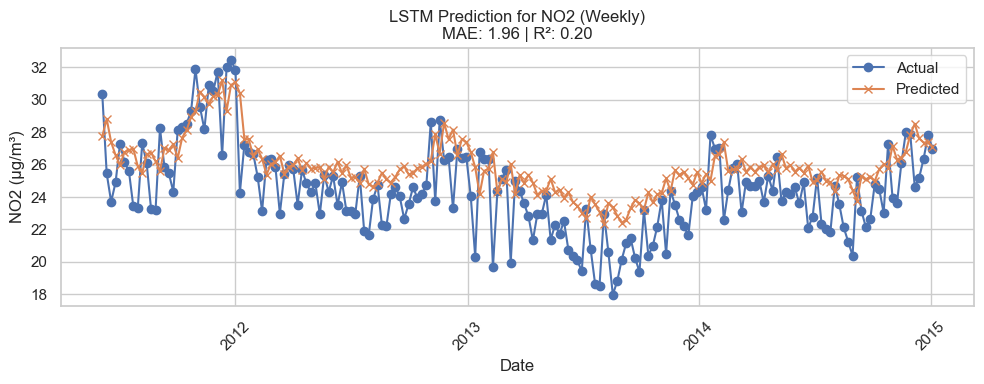

D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


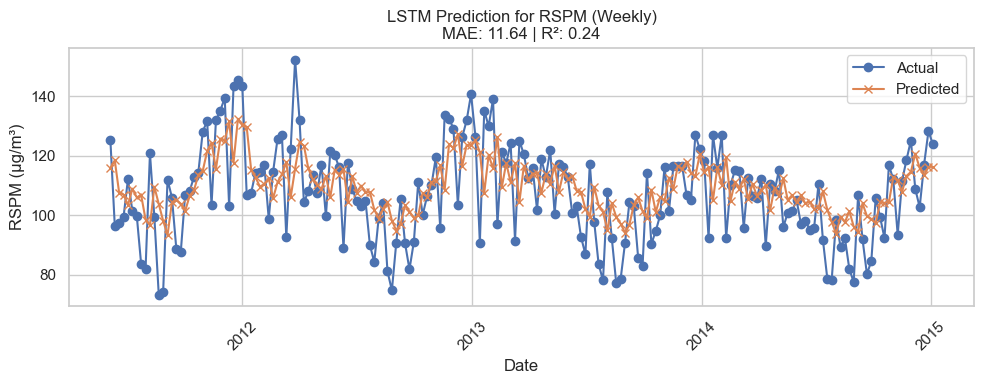

D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


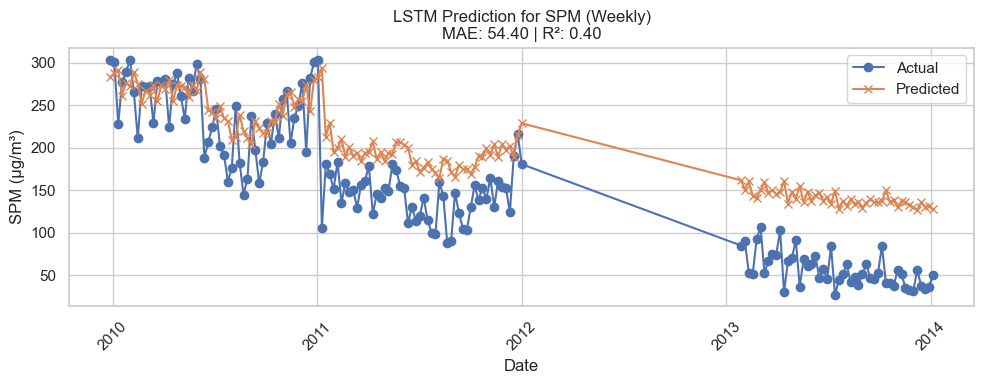


📊 Summary Table


,Pollutant,MAE,R2
0,SO2,0.700836,0.434416
1,NO2,1.961727,0.195053
2,RSPM,11.637262,0.240939
3,SPM,54.402427,0.403106


In [102]:
# Model 1: LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

results = []
pollutants = ['so2', 'no2']

for pollutant in pollutants:
    # Clean & prepare data
    temp_df = df[['date', pollutant]].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'], errors='coerce')
    temp_df = temp_df.dropna()
    temp_df = temp_df.sort_values('date')

    # Weekly aggregation
    weekly_df = temp_df.groupby(pd.Grouper(key='date', freq='W'))[pollutant].mean().reset_index()

    # Lag features
    for lag in [1, 2, 3]:
        weekly_df[f'{pollutant}_lag{lag}'] = weekly_df[pollutant].shift(lag)

    # Time features
    weekly_df['week'] = weekly_df['date'].dt.isocalendar().week.astype(int)
    weekly_df['year'] = weekly_df['date'].dt.year
    weekly_df = weekly_df.dropna()

    # Scaling
    features = [f'{pollutant}_lag1', f'{pollutant}_lag2', f'{pollutant}_lag3', 'week', 'year']
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(weekly_df[features])
    y_scaled = scaler_y.fit_transform(weekly_df[[pollutant]])

    X = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
    y = y_scaled

    # Train/test split
    split = int(len(X) * 0.7)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    dates_test = weekly_df['date'].iloc[split:]
    y_true_unscaled = weekly_df[pollutant].values[split:]

    # Model
    model = Sequential([
        LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=False),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=0)

    # Prediction
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_test_inv = scaler_y.inverse_transform(y_test)

    # Evaluation
    mae = mean_absolute_error(y_true_unscaled, y_pred)
    r2 = r2_score(y_true_unscaled, y_pred)
    results.append({'Pollutant': pollutant.upper(), 'MAE': mae, 'R2': r2})

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(dates_test, y_true_unscaled, label='Actual', marker='o')
    plt.plot(dates_test, y_pred, label='Predicted', marker='x')
    plt.title(f"LSTM Prediction for {pollutant.upper()} (Weekly)\nMAE: {mae:.2f} | R²: {r2:.2f}")
    plt.xlabel("Date")
    plt.ylabel(f"{pollutant.upper()} (µg/m³)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.tight_layout()
    plt.show()

# Results summary
results_df = pd.DataFrame(results)
print("\n📊 Summary Table")
display(results_df)


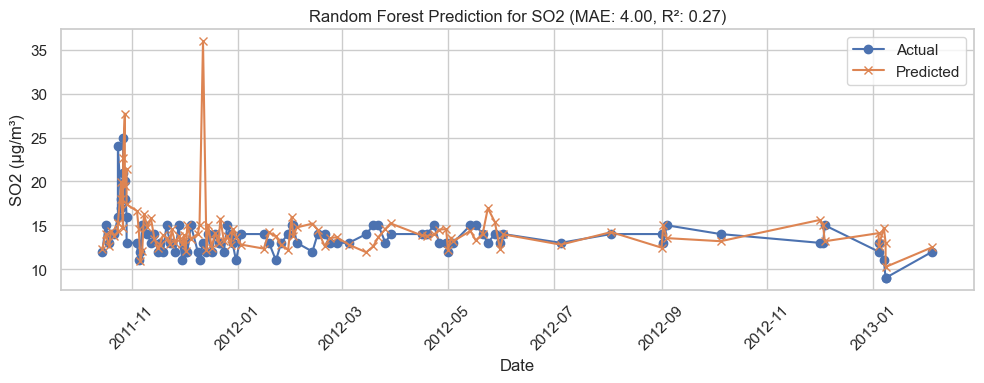

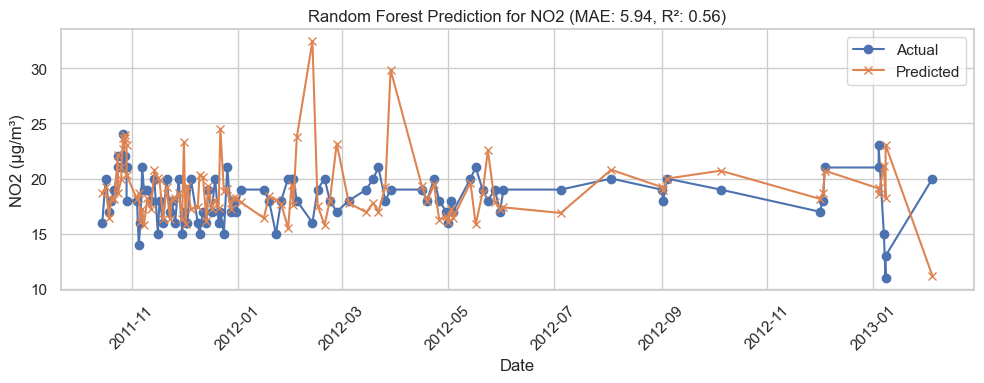

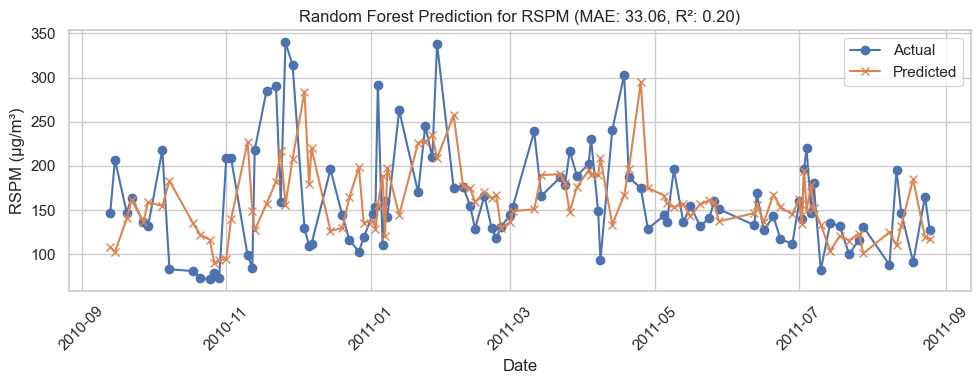

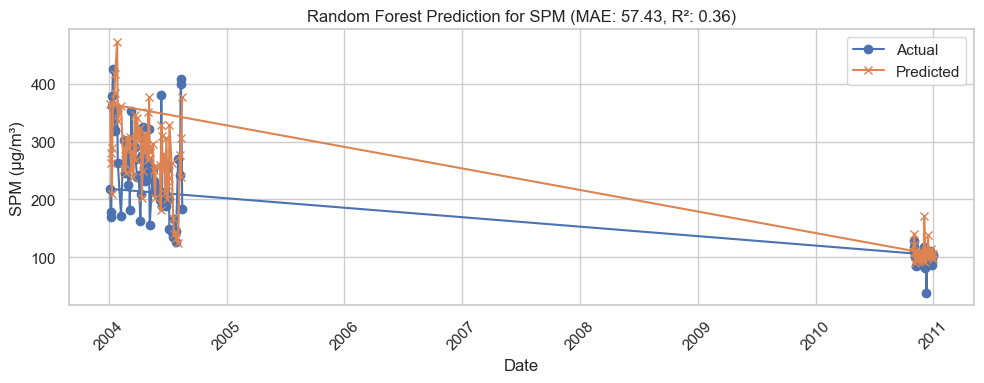

📊 Random Forest Model Performance Summary
  Pollutant        MAE        R2
0       SO2   4.001216  0.271548
1       NO2   5.942425  0.557206
2      RSPM  33.055821  0.201033
3       SPM  57.426120  0.363759


In [104]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df = df[df['year'].isin([1987, 1988, 1989] + list(range(2003, 2015)))].dropna(subset=['location'])

# Encode location
le = LabelEncoder()
df['location_encoded'] = le.fit_transform(df['location'])

# Define target pollutants
pollutants = ['so2', 'no2', 'rspm', 'spm']
results = []

for pollutant in pollutants:
    if pollutant not in df.columns:
        continue

    # Prepare data
    temp = df[['date', 'year', 'month', 'location', 'location_encoded', pollutant]].copy()
    temp = temp.sort_values(['location', 'date'])
    temp['lag1'] = temp.groupby('location')[pollutant].shift(1)
    temp['lag2'] = temp.groupby('location')[pollutant].shift(2)
    temp['lag3'] = temp.groupby('location')[pollutant].shift(3)
    temp = temp.dropna()

    features = ['location_encoded', 'year', 'month', 'lag1', 'lag2', 'lag3']
    X = temp[features]
    y = temp[pollutant]
    dates = temp['date']

    # Train-test split
    split_index = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
    date_test = dates.iloc[split_index:]

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Pollutant': pollutant.upper(), 'MAE': mae, 'R2': r2})

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(date_test.values[:100], y_test.values[:100], label='Actual', marker='o')
    plt.plot(date_test.values[:100], y_pred[:100], label='Predicted', marker='x')
    plt.title(f"Random Forest Prediction for {pollutant.upper()} (MAE: {mae:.2f}, R²: {r2:.2f})")
    plt.xlabel("Date"); plt.ylabel(f"{pollutant.upper()} (µg/m³)")
    plt.xticks(rotation=45)
    plt.legend(); plt.tight_layout(); plt.show()

# Summary table
results_df = pd.DataFrame(results)
print("📊 Random Forest Model Performance Summary")
print(results_df)


## 🎯 Objective

**Build multiple detailed models** (`XGBoost`, `LSTM`, `Random Forest`, etc.) for **SO₂** and **NO₂**, and select the best model per pollutant based on:

- ✅ **R² ≥ 0.90**
- ✅ **MAE ≤ 0.10**

---

## ✅ Modeling Workflow

1. **Prepare the dataset** with:
   - `date`, lag features, `month`, `year`, `location` (encoded)

2. **Train and evaluate the following models**:
   - `XGBoost`
   - `Random Forest`
   - `LSTM`
   - *(Optional: Linear Regression, SVR, etc.)*

3. **Evaluate each model** using:
   - R² score
   - MAE (Mean Absolute Error)

4. **Save the final model** per pollutant that passes both performance thresholds.

5. **Display a summary table** with R² and MAE for each model across pollutants.

---

## 📦 Output Goals

- Trained models saved (e.g., `.pkl` for XGBoost/Random Forest, `.h5` for LSTM)
- Comparison table of all models and results
- Best model(s) selected and saved if:
  - R² ≥ 0.90 **and**
  - MAE ≤ 0.10

---



In [116]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm
from tqdm.keras import TqdmCallback

# Load and preprocess data
print("📥 Loading and preparing data...")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df = df[df['year'].isin([1987, 1988, 1989] + list(range(2003, 2015)))].dropna(subset=['location'])
df['location_encoded'] = LabelEncoder().fit_transform(df['location'])

# Evaluate and return model info
def evaluate_model(model_name, y_test, y_pred, pollutant, model_obj, format):
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"📊 {model_name} for {pollutant.upper()}: MAE = {mae:.4f}, R² = {r2:.4f}")
    return {
        'Model': model_name,
        'Pollutant': pollutant.upper(),
        'MAE': mae,
        'R2': r2,
        'Object': model_obj,
        'Format': format
    }

# Build and select best model
def build_models(pollutant):
    print(f"\n🚀 Processing {pollutant.upper()}...")
    df_pollutant = df[['date', 'year', 'month', 'location', 'location_encoded', pollutant]].copy()
    df_pollutant = df_pollutant.sort_values(['location', 'date'])

    print("📦 Generating lag features...")
    df_pollutant['lag1'] = df_pollutant.groupby('location')[pollutant].shift(1)
    df_pollutant['lag2'] = df_pollutant.groupby('location')[pollutant].shift(2)
    df_pollutant['lag3'] = df_pollutant.groupby('location')[pollutant].shift(3)
    df_pollutant = df_pollutant.dropna()

    features = ['location_encoded', 'year', 'month', 'lag1', 'lag2', 'lag3']
    X = df_pollutant[features]
    y = df_pollutant[pollutant]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    results = []

    for model_name in tqdm(['Random Forest', 'XGBoost', 'LSTM'], desc=f"{pollutant.upper()} Model Training"):
        print(f"\n🔧 Training {model_name} for {pollutant.upper()}...")

        if model_name == 'Random Forest':
            model = RandomForestRegressor(n_estimators=30, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            results.append(evaluate_model(model_name, y_test, y_pred, pollutant, model, 'pkl'))

        elif model_name == 'XGBoost':
            model = XGBRegressor(n_estimators=30, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            results.append(evaluate_model(model_name, y_test, y_pred, pollutant, model, 'pkl'))

        elif model_name == 'LSTM':
            print("⚙️ Scaling data for LSTM...")
            scaler_X = MinMaxScaler()
            scaler_y = MinMaxScaler()
            X_scaled = scaler_X.fit_transform(X)
            y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

            def create_sequences(Xs, ys, time_steps=12):
                Xs_out, ys_out = [], []
                for i in range(time_steps, len(Xs)):
                    Xs_out.append(Xs[i-time_steps:i])
                    ys_out.append(ys[i])
                return np.array(Xs_out), np.array(ys_out)

            print("📈 Creating sequences for LSTM...")
            X_seq, y_seq = create_sequences(X_scaled, y_scaled)
            X_seq_train, X_seq_test = X_seq[:int(0.8*len(X_seq))], X_seq[int(0.8*len(X_seq)):]
            y_seq_train, y_seq_test = y_seq[:int(0.8*len(y_seq))], y_seq[int(0.8*len(y_seq)):]

            print("🧠 Building LSTM model...")
            lstm_model = Sequential()
            lstm_model.add(LSTM(32, activation='relu', input_shape=(X_seq_train.shape[1], X_seq_train.shape[2])))
            lstm_model.add(Dense(1))
            lstm_model.compile(optimizer='adam', loss='mse')

            es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
            lstm_model.fit(
                X_seq_train, y_seq_train,
                validation_split=0.1,
                epochs=30,
                batch_size=32,
                callbacks=[es, TqdmCallback(verbose=1)],
                verbose=0
            )

            print("📤 Making predictions with LSTM...")
            y_pred_seq = lstm_model.predict(X_seq_test)
            y_pred_inv = scaler_y.inverse_transform(y_pred_seq)
            y_test_inv = scaler_y.inverse_transform(y_seq_test)

            results.append(evaluate_model(model_name, y_test_inv, y_pred_inv, pollutant, lstm_model, 'h5'))

    # Select and save best model by highest R²
    best_model = max(results, key=lambda x: x['R2'])
    filename = f"{pollutant}_best_model.{best_model['Format']}"
    if best_model['Format'] == 'pkl':
        joblib.dump(best_model['Object'], filename)
    else:
        save_model(best_model['Object'], filename)
    print(f"\n🏆 Best model for {pollutant.upper()}: {best_model['Model']} (R² = {best_model['R2']:.4f})")
    print(f"✅ Model saved as {filename}")

    return results

# Run for SO2 and NO2
results_all = []
for pol in ['so2', 'no2']:
    results_all += build_models(pol)

# Display final summary
results_df = pd.DataFrame(results_all)
print("\n📊 Final Model Comparison Summary")
print(results_df)

📥 Loading and preparing data...

🚀 Processing SO2...
📦 Generating lag features...


SO2 Model Training:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Training Random Forest for SO2...


SO2 Model Training:  33%|███▎      | 1/3 [00:18<00:36, 18.39s/it]

📊 Random Forest for SO2: MAE = 4.0562, R² = 0.2621

🔧 Training XGBoost for SO2...
📊 XGBoost for SO2: MAE = 3.6367, R² = 0.1561

🔧 Training LSTM for SO2...
⚙️ Scaling data for LSTM...
📈 Creating sequences for LSTM...
🧠 Building LSTM model...


D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

📤 Making predictions with LSTM...
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


SO2 Model Training: 100%|██████████| 3/3 [02:35<00:00, 51.71s/it]


📊 LSTM for SO2: MAE = 3.0520, R² = 0.4109

🏆 Best model for SO2: LSTM (R² = 0.4109)
✅ Model saved as so2_best_model.h5

🚀 Processing NO2...
📦 Generating lag features...


NO2 Model Training:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Training Random Forest for NO2...


NO2 Model Training:  33%|███▎      | 1/3 [00:23<00:46, 23.23s/it]

📊 Random Forest for NO2: MAE = 6.0830, R² = 0.5400

🔧 Training XGBoost for NO2...
📊 XGBoost for NO2: MAE = 4.9970, R² = 0.6312

🔧 Training LSTM for NO2...
⚙️ Scaling data for LSTM...
📈 Creating sequences for LSTM...
🧠 Building LSTM model...


D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

📤 Making predictions with LSTM...
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


NO2 Model Training: 100%|██████████| 3/3 [04:51<00:00, 97.08s/it] 

📊 LSTM for NO2: MAE = 5.6135, R² = 0.5347

🏆 Best model for NO2: XGBoost (R² = 0.6312)
✅ Model saved as no2_best_model.pkl

📊 Final Model Comparison Summary
           Model Pollutant       MAE        R2  \
0  Random Forest       SO2  4.056167  0.262096   
1        XGBoost       SO2  3.636712  0.156081   
2           LSTM       SO2  3.051951  0.410918   
3  Random Forest       NO2  6.083028  0.539995   
4        XGBoost       NO2  4.996971  0.631198   
5           LSTM       NO2  5.613545  0.534686   

                                              Object Format  
0  (DecisionTreeRegressor(max_features=1.0, rando...    pkl  
1  XGBRegressor(base_score=None, booster=None, ca...    pkl  
2        <Sequential name=sequential_14, built=True>     h5  
3  (DecisionTreeRegressor(max_features=1.0, rando...    pkl  
4  XGBRegressor(base_score=None, booster=None, ca...    pkl  
5        <Sequential name=sequential_15, built=True>     h5  



📉 Plotting predictions for best SO2 model...
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step


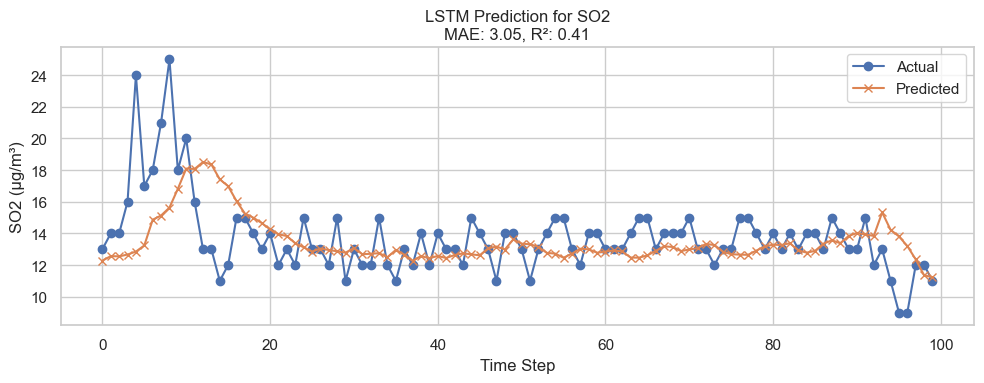


📉 Plotting predictions for best NO2 model...


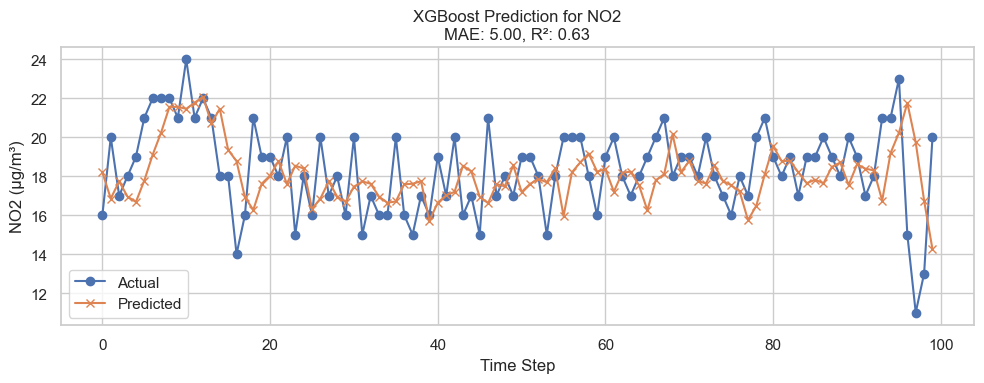

In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def plot_best_model_predictions(best_model_info, X, y, pollutant):
    model = best_model_info['Object']
    model_name = best_model_info['Model']
    format = best_model_info['Format']

    if model_name == 'LSTM':
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_scaled = scaler_X.fit_transform(X)
        y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

        def create_sequences(Xs, ys, time_steps=12):
            Xs_out, ys_out = [], []
            for i in range(time_steps, len(Xs)):
                Xs_out.append(Xs[i-time_steps:i])
                ys_out.append(ys[i])
            return np.array(Xs_out), np.array(ys_out)

        X_seq, y_seq = create_sequences(X_scaled, y_scaled)
        X_seq_test = X_seq[int(0.8 * len(X_seq)):]
        y_seq_test = y_seq[int(0.8 * len(y_seq)):]

        y_pred = model.predict(X_seq_test)
        y_pred_inv = scaler_y.inverse_transform(y_pred)
        y_test_inv = scaler_y.inverse_transform(y_seq_test)

        # Calculate metrics
        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        r2 = r2_score(y_test_inv, y_pred_inv)

        plt.figure(figsize=(10, 4))
        plt.plot(y_test_inv[:100], label='Actual', marker='o')
        plt.plot(y_pred_inv[:100], label='Predicted', marker='x')
        plt.title(f"{model_name} Prediction for {pollutant.upper()}\nMAE: {mae:.2f}, R²: {r2:.2f}")
        plt.xlabel("Time Step"); plt.ylabel(f"{pollutant.upper()} (µg/m³)")
        plt.legend(); plt.tight_layout(); plt.show()

    else:
        # For Random Forest and XGBoost
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        y_pred = model.predict(X_test)

        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        plt.figure(figsize=(10, 4))
        plt.plot(y_test.values[:100], label='Actual', marker='o')
        plt.plot(y_pred[:100], label='Predicted', marker='x')
        plt.title(f"{model_name} Prediction for {pollutant.upper()}\nMAE: {mae:.2f}, R²: {r2:.2f}")
        plt.xlabel("Time Step"); plt.ylabel(f"{pollutant.upper()} (µg/m³)")
        plt.legend(); plt.tight_layout(); plt.show()

# Re-run just the best model for plotting (SO2 and NO2)
for pol in ['so2', 'no2']:
    print(f"\n📉 Plotting predictions for best {pol.upper()} model...")
    best_model_row = results_df[results_df['Pollutant'] == pol.upper()].sort_values(by='R2', ascending=False).iloc[0]

    df_pol = df[['date', 'year', 'month', 'location', 'location_encoded', pol]].copy()
    df_pol = df_pol.sort_values(['location', 'date'])
    df_pol['lag1'] = df_pol.groupby('location')[pol].shift(1)
    df_pol['lag2'] = df_pol.groupby('location')[pol].shift(2)
    df_pol['lag3'] = df_pol.groupby('location')[pol].shift(3)
    df_pol = df_pol.dropna()
    X_plot = df_pol[['location_encoded', 'year', 'month', 'lag1', 'lag2', 'lag3']]
    y_plot = df_pol[pol]

    plot_best_model_predictions(best_model_row, X_plot, y_plot, pol)

In [ ]:
# target R-squared 0.75

In [119]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm
from tqdm.keras import TqdmCallback

# Load and preprocess data
print("📥 Loading and preparing data...")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df = df[df['year'].isin([1987, 1988, 1989] + list(range(2003, 2015)))].dropna(subset=['location'])
df['location_encoded'] = LabelEncoder().fit_transform(df['location'])

# Set R² threshold
target_r2 = 0.75

# Evaluate and return model info
def evaluate_model(model_name, y_test, y_pred, pollutant, model_obj, format):
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"📊 {model_name} for {pollutant.upper()}: MAE = {mae:.4f}, R² = {r2:.4f}")
    return {
        'Model': model_name,
        'Pollutant': pollutant.upper(),
        'MAE': mae,
        'R2': r2,
        'Object': model_obj,
        'Format': format,
        'Y_true': y_test,
        'Y_pred': y_pred
    }

# Build and evaluate models with tuning
def build_models(pollutant):
    print(f"\n🚀 Processing {pollutant.upper()}...")
    df_pol = df[['date', 'year', 'month', 'location', 'location_encoded', pollutant]].copy()
    df_pol = df_pol.sort_values(['location', 'date'])
    df_pol['lag1'] = df_pol.groupby('location')[pollutant].shift(1)
    df_pol['lag2'] = df_pol.groupby('location')[pollutant].shift(2)
    df_pol['lag3'] = df_pol.groupby('location')[pollutant].shift(3)
    df_pol = df_pol.dropna()

    features = ['location_encoded', 'year', 'month', 'lag1', 'lag2', 'lag3']
    X = df_pol[features]
    y = df_pol[pollutant]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    results = []

    for model_name in tqdm(['Random Forest', 'XGBoost', 'LSTM'], desc=f"{pollutant.upper()} Model Training"):
        print(f"\n🔧 Training {model_name} for {pollutant.upper()}...")

        if model_name == 'Random Forest':
            param_grid = {
                'n_estimators': [50, 100],
                'max_depth': [5, 10, None],
                'min_samples_split': [2, 5]
            }
            base_model = RandomForestRegressor(random_state=42)
            search = RandomizedSearchCV(base_model, param_grid, n_iter=5, scoring='r2', cv=3, n_jobs=-1, random_state=42)
            search.fit(X_train, y_train)
            best_model = search.best_estimator_
            y_pred = best_model.predict(X_test)
            results.append(evaluate_model(model_name, y_test, y_pred, pollutant, best_model, 'pkl'))

        elif model_name == 'XGBoost':
            param_grid = {
                'n_estimators': [50, 100],
                'max_depth': [3, 5],
                'learning_rate': [0.05, 0.1]
            }
            base_model = XGBRegressor(random_state=42)
            search = RandomizedSearchCV(base_model, param_grid, n_iter=5, scoring='r2', cv=3, n_jobs=-1, random_state=42)
            search.fit(X_train, y_train)
            best_model = search.best_estimator_
            y_pred = best_model.predict(X_test)
            results.append(evaluate_model(model_name, y_test, y_pred, pollutant, best_model, 'pkl'))

        elif model_name == 'LSTM':
            scaler_X = MinMaxScaler()
            scaler_y = MinMaxScaler()
            X_scaled = scaler_X.fit_transform(X)
            y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

            def create_sequences(Xs, ys, time_steps=12):
                Xs_out, ys_out = [], []
                for i in range(time_steps, len(Xs)):
                    Xs_out.append(Xs[i-time_steps:i])
                    ys_out.append(ys[i])
                return np.array(Xs_out), np.array(ys_out)

            X_seq, y_seq = create_sequences(X_scaled, y_scaled)
            X_seq_train, X_seq_test = X_seq[:int(0.8*len(X_seq))], X_seq[int(0.8*len(X_seq)):]
            y_seq_train, y_seq_test = y_seq[:int(0.8*len(y_seq))], y_seq[int(0.8*len(y_seq)):]

            lstm_model = Sequential()
            lstm_model.add(LSTM(32, activation='relu', input_shape=(X_seq_train.shape[1], X_seq_train.shape[2])))
            lstm_model.add(Dense(1))
            lstm_model.compile(optimizer='adam', loss='mse')

            es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
            lstm_model.fit(
                X_seq_train, y_seq_train,
                validation_split=0.1,
                epochs=30,
                batch_size=32,
                callbacks=[es, TqdmCallback(verbose=1)],
                verbose=0
            )

            y_pred_seq = lstm_model.predict(X_seq_test)
            y_pred_inv = scaler_y.inverse_transform(y_pred_seq)
            y_test_inv = scaler_y.inverse_transform(y_seq_test)

            results.append(evaluate_model(model_name, y_test_inv, y_pred_inv, pollutant, lstm_model, 'h5'))

    best_model = max(results, key=lambda x: x['R2'])
    if best_model['R2'] >= target_r2:
        filename = f"{pollutant}_best_model.{best_model['Format']}"
        if best_model['Format'] == 'pkl':
            joblib.dump(best_model['Object'], filename)
        else:
            save_model(best_model['Object'], filename)
        print(f"\n🏆 Best model for {pollutant.upper()} (R² = {best_model['R2']:.4f}) saved as {filename}")
    else:
        print(f"⚠️ No model met the R² ≥ {target_r2} threshold for {pollutant.upper()}.")

    return results

# Run for SO2 and NO2
results_all = []
for pol in ['so2', 'no2']:
    results_all += build_models(pol)

# Summary
results_df = pd.DataFrame(results_all)
print("\n📊 Final Model Comparison Summary")
print(results_df)


📥 Loading and preparing data...

🚀 Processing SO2...


SO2 Model Training:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Training Random Forest for SO2...


SO2 Model Training:  33%|███▎      | 1/3 [01:04<02:08, 64.41s/it]

📊 Random Forest for SO2: MAE = 3.1345, R² = 0.2978

🔧 Training XGBoost for SO2...


SO2 Model Training:  67%|██████▋   | 2/3 [01:07<00:28, 28.06s/it]

📊 XGBoost for SO2: MAE = 3.1153, R² = 0.3071

🔧 Training LSTM for SO2...


D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2041/2041 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step


SO2 Model Training: 100%|██████████| 3/3 [05:12<00:00, 104.03s/it]


📊 LSTM for SO2: MAE = 3.1013, R² = 0.4326
⚠️ No model met the R² ≥ 0.75 threshold for SO2.

🚀 Processing NO2...


NO2 Model Training:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Training Random Forest for NO2...


NO2 Model Training:  33%|███▎      | 1/3 [01:08<02:17, 68.57s/it]

📊 Random Forest for NO2: MAE = 5.1728, R² = 0.6233

🔧 Training XGBoost for NO2...


NO2 Model Training:  67%|██████▋   | 2/3 [01:10<00:29, 29.44s/it]

📊 XGBoost for NO2: MAE = 5.2652, R² = 0.6259

🔧 Training LSTM for NO2...


D:\Brian\PythonLab\BootCamp\NYU_Data_Science_BootCamp\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2041/2041 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step


NO2 Model Training: 100%|██████████| 3/3 [04:05<00:00, 81.91s/it]

📊 LSTM for NO2: MAE = 4.8923, R² = 0.6201
⚠️ No model met the R² ≥ 0.75 threshold for NO2.

📊 Final Model Comparison Summary
           Model Pollutant       MAE        R2  \
0  Random Forest       SO2  3.134541  0.297791   
1        XGBoost       SO2  3.115320  0.307102   
2           LSTM       SO2  3.101250  0.432631   
3  Random Forest       NO2  5.172807  0.623278   
4        XGBoost       NO2  5.265177  0.625899   
5           LSTM       NO2  4.892262  0.620065   

                                              Object Format  \
0  (DecisionTreeRegressor(max_depth=5, max_featur...    pkl   
1  XGBRegressor(base_score=None, booster=None, ca...    pkl   
2        <Sequential name=sequential_16, built=True>     h5   
3  (DecisionTreeRegressor(max_depth=5, max_featur...    pkl   
4  XGBRegressor(base_score=None, booster=None, ca...    pkl   
5        <Sequential name=sequential_17, built=True>     h5   

                                              Y_true  \
0  96390     12.0
96288   


📉 Plotting predictions for best SO2 model...
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step


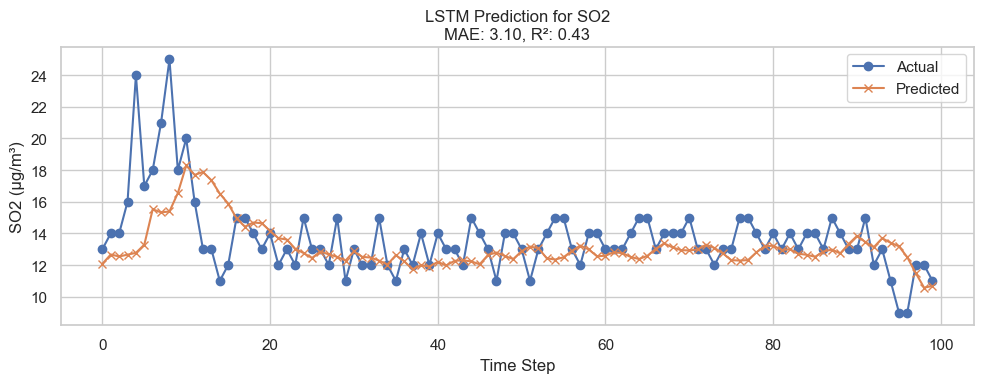


📉 Plotting predictions for best NO2 model...


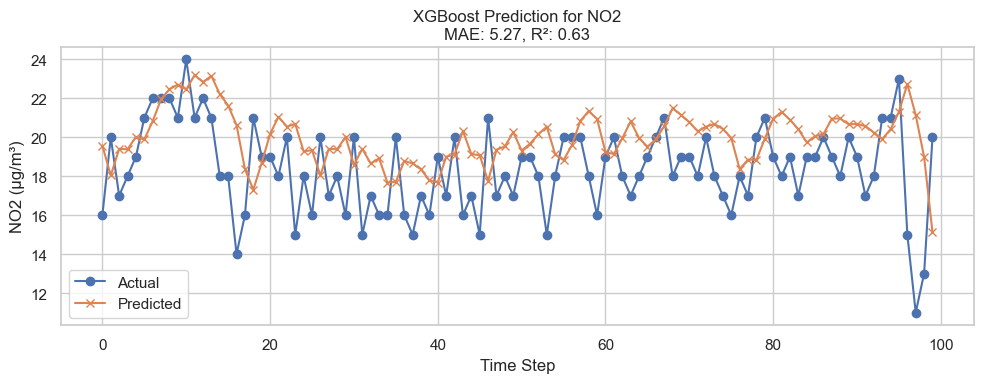

In [120]:
# Re-run just the best model for plotting (SO2 and NO2)
for pol in ['so2', 'no2']:
    print(f"\n📉 Plotting predictions for best {pol.upper()} model...")
    best_model_row = results_df[results_df['Pollutant'] == pol.upper()].sort_values(by='R2', ascending=False).iloc[0]

    df_pol = df[['date', 'year', 'month', 'location', 'location_encoded', pol]].copy()
    df_pol = df_pol.sort_values(['location', 'date'])
    df_pol['lag1'] = df_pol.groupby('location')[pol].shift(1)
    df_pol['lag2'] = df_pol.groupby('location')[pol].shift(2)
    df_pol['lag3'] = df_pol.groupby('location')[pol].shift(3)
    df_pol = df_pol.dropna()
    X_plot = df_pol[['location_encoded', 'year', 'month', 'lag1', 'lag2', 'lag3']]
    y_plot = df_pol[pol]

    plot_best_model_predictions(best_model_row, X_plot, y_plot, pol)